In [592]:
from pandas_datareader import data as pdr
import numpy as np
import requests
import datetime as dt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import matplotlib.ticker as mtick
import yfinance as yfin
import matplotlib.pyplot as plt
yfin.pdr_override()

In [663]:
# Realizei alguns testes mudando os periodos de analise (2022/2021/2020/2016) para analisar como se comporta a analise em cenarios pre crise pos crise estabilidade e com taxas de juros diferentes.
ano = 2016
# 10 anos
inicio = dt.date(ano-10, 1, 1)
final = dt.date(ano, 12, 31)
# 5 anos
inicio1 = dt.date(ano-5, 1, 1)
final1 = dt.date(ano, 12, 31)
# 1 ano
inicio2 = dt.date(ano, 1, 1)
final2 = dt.date(ano, 12, 31)
# 1/2 ano
inicio4 = dt.date(ano, 7, 1)
final4 = dt.date(ano, 12, 31)

data_inicial = str(inicio)
data_final = str(final)

In [664]:
#Montando banco de dados

lista_acoes = ["WEGE3", "LREN3","VALE3", "PETR4", "EQTL3", "EGIE3"]
lista_acoes = [acao + ".SA" for acao in lista_acoes]

precos = pdr.get_data_yahoo(lista_acoes, inicio, final)['Adj Close']

precos1 = pdr.get_data_yahoo(lista_acoes, inicio1, final1)['Adj Close']

precos2 = pdr.get_data_yahoo(lista_acoes, inicio2, final2)['Adj Close']

precos4 = pdr.get_data_yahoo(lista_acoes, inicio4, final4)['Adj Close']


# Definir os códigos das séries no Banco Central
codigo_selic = 11
codigo_dolar = 1
codigo_ipca = 433

# Definir o período desejado (formato: AAAAMM)
periodo_inicio = "201001"
periodo_fim = "202012"

# Montar as URLs da API do Banco Central para as séries
url_selic = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_selic}/dados?formato=json&dataInicial={periodo_inicio}&dataFinal={periodo_fim}"
url_dolar = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_dolar}/dados?formato=json&dataInicial={periodo_inicio}&dataFinal={periodo_fim}"
url_ipca = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_ipca}/dados?formato=json&dataInicial={periodo_inicio}&dataFinal={periodo_fim}"


# Fazer as requisições à API
response_selic = requests.get(url_selic)
dados_selic = response_selic.json()

response_dolar = requests.get(url_dolar)
dados_dolar = response_dolar.json()

response_ipca = requests.get(url_ipca)
dados_ipca = response_ipca.json()

# Converter os dados para DataFrames
df_selic = pd.DataFrame(dados_selic)
df_dolar = pd.DataFrame(dados_dolar)
df_ipca = pd.DataFrame(dados_ipca)

# Converter as colunas de data para formato datetime
df_selic["data"] = pd.to_datetime(df_selic["data"], dayfirst=True)
df_dolar["data"] = pd.to_datetime(df_dolar["data"], dayfirst=True)
df_ipca["data"] = pd.to_datetime(df_ipca["data"], dayfirst=True)

# Filtrar os dados para o período de 2012 a 2022
df_selic = df_selic[(df_selic["data"] >= data_inicial) & (df_selic["data"] <= data_final)]
df_dolar = df_dolar[(df_dolar["data"] >= data_inicial) & (df_dolar["data"] <= data_final)]
df_ipca = df_ipca[(df_ipca["data"] >= data_inicial) & (df_ipca["data"] <= data_final)]

# Definir a data como índice
df_selic.set_index("data", inplace=True)
df_dolar.set_index("data", inplace=True)
df_ipca.set_index("data", inplace=True)

# Renomear colunas
df_selic.rename(columns={"valor": "Selic"}, inplace=True)
df_dolar.rename(columns={"valor": "Dólar"}, inplace=True)
df_ipca.rename(columns={"valor": "IPCA"}, inplace=True)

#retorno selic diario
display(df_selic)
df_selic = df_selic.astype(float)/100
display(df_ipca)
df_ipca = df_ipca.astype(float)/100
display(df_ipca)
# Juntar os DataFrames em um único DataFrame
precos = precos.merge(df_dolar.astype(float), left_index=True, right_index=True)
precos1 = precos1.merge(df_dolar.astype(float), left_index=True, right_index=True)
precos2 = precos2.merge(df_dolar.astype(float), left_index=True, right_index=True)
precos4 = precos4.merge(df_dolar.astype(float), left_index=True, right_index=True)


# Exibir o DataFrame final
display(precos)
display(precos1)
display(precos2)
display(precos4)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


,Selic
data,
2006-01-02,0.065635
2006-01-03,0.065635
2006-01-04,0.065601
2006-01-05,0.065567
2006-01-06,0.065534
...,...
2016-12-26,0.050788
2016-12-27,0.050788
2016-12-28,0.050788


,IPCA
data,
2006-01-01,0.59
2006-02-01,0.41
2006-03-01,0.43
2006-04-01,0.21
2006-05-01,0.10
...,...
2016-08-01,0.44
2016-09-01,0.08
2016-10-01,0.26


,IPCA
data,
2006-01-01,0.0059
2006-02-01,0.0041
2006-03-01,0.0043
2006-04-01,0.0021
2006-05-01,0.0010
...,...
2016-08-01,0.0044
2016-09-01,0.0008
2016-10-01,0.0026


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2006-01-02,4.831061,NaN,1.746606,5.099000,11.060599,0.804700,2.3370
2006-01-03,4.824650,NaN,1.844650,5.259642,11.499324,0.804700,2.3460
2006-01-04,4.818236,NaN,1.953870,5.285075,11.678280,0.804700,2.3066
2006-01-05,4.795798,NaN,2.078462,5.274366,11.660964,0.804700,2.2825
2006-01-06,4.808621,NaN,2.095929,5.468473,11.800659,0.804700,2.2870
...,...,...,...,...,...,...,...
2016-12-23,16.333630,9.162280,15.592971,5.049130,15.968812,5.159222,3.2696
2016-12-26,16.376692,9.231953,15.803203,5.112953,16.475960,5.114058,3.2701
2016-12-27,16.362335,9.315949,16.383133,5.109406,16.393547,5.197440,3.2776
2016-12-28,16.649395,9.510324,16.847078,5.240599,16.913372,5.211337,3.2774


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2011-01-03,9.335190,1.807760,7.161461,8.283161,27.773317,2.520232,1.6510
2011-01-04,9.213278,1.809332,7.062360,8.252481,28.348572,2.476661,1.6556
2011-01-05,9.370025,1.799892,7.005911,8.350654,28.860466,2.443409,1.6713
2011-01-06,9.491939,1.817200,6.836564,8.316907,28.489948,2.417038,1.6857
2011-01-07,9.526771,1.799892,6.773841,8.200331,28.275452,2.420477,1.6861
...,...,...,...,...,...,...,...
2016-12-23,16.333633,9.162279,15.592977,5.049130,15.968809,5.159223,3.2696
2016-12-26,16.376692,9.231954,15.803197,5.112953,16.475958,5.114058,3.2701
2016-12-27,16.362337,9.315950,16.383135,5.109407,16.393547,5.197439,3.2776
2016-12-28,16.649389,9.510324,16.847078,5.240599,16.913374,5.211337,3.2774


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2016-01-04,14.862656,5.655548,11.487569,2.435921,7.997640,4.959123,4.0387
2016-01-05,15.040131,5.929757,12.305569,2.368552,7.890501,5.199628,4.0114
2016-01-06,14.817151,5.964033,12.234440,2.269272,7.310688,5.081069,4.0303
2016-01-07,14.471294,5.799508,12.035274,2.219631,6.875828,4.935413,4.0475
2016-01-08,14.266514,5.878343,12.006822,2.223177,6.642642,4.911699,4.0250
...,...,...,...,...,...,...,...
2016-12-23,16.333626,9.162277,15.592970,5.049129,15.968810,5.159224,3.2696
2016-12-26,16.376688,9.231954,15.803205,5.112952,16.475960,5.114059,3.2701
2016-12-27,16.362337,9.315950,16.383135,5.109406,16.393547,5.197441,3.2776
2016-12-28,16.649397,9.510324,16.847076,5.240600,16.913372,5.211336,3.2774


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2016-07-01,17.520662,8.500365,17.338900,3.481914,10.474453,4.710623,3.2298
2016-07-04,17.685907,8.482944,17.648909,3.499642,10.695032,4.655648,3.2480
2016-07-05,17.786892,8.618814,17.483093,3.293989,10.121519,4.604111,3.2904
2016-07-06,17.897055,8.547397,17.468666,3.368451,10.266474,4.604111,3.3242
2016-07-07,17.998037,8.657132,17.627281,3.389725,10.096313,4.652213,3.3388
...,...,...,...,...,...,...,...
2016-12-23,16.333628,9.162279,15.592973,5.049130,15.968812,5.159223,3.2696
2016-12-26,16.376688,9.231953,15.803198,5.112953,16.475958,5.114058,3.2701
2016-12-27,16.362337,9.315949,16.383135,5.109407,16.393547,5.197440,3.2776
2016-12-28,16.649395,9.510324,16.847082,5.240600,16.913376,5.211337,3.2774


In [665]:
display(precos.dtypes)

EGIE3.SA    float64
EQTL3.SA    float64
LREN3.SA    float64
PETR4.SA    float64
VALE3.SA    float64
WEGE3.SA    float64
Dólar       float64
dtype: object

In [666]:
display("10 ANOS")
precos_c_selic = precos.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos_c_selic.describe()
inicial = pd.DataFrame(precos_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos_c_selic.iloc[len(precos_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos.iloc[len(precos)-1]/precos.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)


display("5 ANOS")
precos1_c_selic = precos1.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos1_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos1_c_selic.describe()
inicial = pd.DataFrame(precos1_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos1_c_selic.iloc[len(precos1_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos1.iloc[len(precos1)-1]/precos1.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos1_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)


display("1 ANO")
precos2_c_selic = precos2.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos2_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos2_c_selic.describe()
inicial = pd.DataFrame(precos2_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos2_c_selic.iloc[len(precos2_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos2.iloc[len(precos2)-1]/precos2.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos2_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)



display("0,5 ANOS")
precos4_c_selic = precos4.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos4_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos4_c_selic.describe()
inicial = pd.DataFrame(precos4_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos4_c_selic.iloc[len(precos4_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos4.iloc[len(precos4)-1]/precos4.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos4_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)

'10 ANOS'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,2722.00,2165.00,2722.00,2722.00,2722.00,2722.00,2722.00,2722.00
mean,10.61,3.56,7.53,6.87,18.39,2.92,2.24,0.04
std,4.16,2.05,4.36,2.41,5.68,1.49,0.62,0.01
min,4.58,1.21,1.47,1.49,5.42,0.80,1.53,0.03
25%,6.74,2.03,3.71,5.56,13.12,1.93,1.79,0.04
50%,9.54,2.74,7.13,6.54,18.68,2.33,2.07,0.04
75%,14.43,4.28,10.01,8.21,22.55,4.03,2.34,0.05
max,19.86,9.97,19.80,15.11,33.53,6.70,4.19,0.07
2006-01-02 00:00:00,4.83,nan,1.75,5.10,11.06,0.80,2.34,0.07
2016-12-29 00:00:00,16.75,9.53,16.80,5.27,16.28,5.39,3.26,0.05


'5 ANOS'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,1485.00,1485.00,1485.00,1485.00,1485.00,1485.00,1485.00,1485.00
mean,13.95,4.21,10.64,5.59,17.29,3.88,2.49,0.04
std,2.52,2.17,3.45,1.74,5.26,1.33,0.72,0.01
min,8.56,1.69,5.80,1.49,5.42,1.76,1.53,0.03
25%,12.86,2.45,7.90,4.37,12.26,2.42,1.99,0.04
50%,14.29,3.56,9.81,5.99,18.13,3.69,2.25,0.04
75%,15.47,5.77,12.97,6.87,20.92,5.05,3.16,0.05
max,19.86,9.92,19.80,8.92,29.86,6.70,4.19,0.05
2011-01-03 00:00:00,9.34,1.81,7.16,8.28,27.77,2.52,1.65,0.04
2016-12-29 00:00:00,16.75,9.53,16.80,5.27,16.28,5.39,3.26,0.05


'1 ANO'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,249.00,249.00,249.00,249.00,249.00,249.00,249.00,249.00
mean,17.20,8.07,16.18,3.82,11.13,5.23,3.48,0.05
std,1.40,1.20,2.33,1.34,3.23,0.48,0.28,0.00
min,13.54,5.66,11.40,1.49,5.42,4.38,3.12,0.05
25%,16.38,6.94,14.88,2.92,9.42,4.83,3.25,0.05
50%,17.02,8.50,16.23,3.62,10.93,5.09,3.40,0.05
75%,18.40,9.07,18.17,4.96,11.97,5.68,3.61,0.05
max,19.86,9.92,19.80,6.45,19.67,6.28,4.16,0.05
2016-01-04 00:00:00,14.86,5.66,11.49,2.44,8.00,4.96,4.04,0.05
2016-12-29 00:00:00,16.75,9.53,16.80,5.27,16.28,5.39,3.26,0.05


'0,5 ANOS'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\594759865.py:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,18.14,9.09,17.97,4.94,13.22,5.54,3.27,0.05
std,1.05,0.31,1.22,0.76,2.84,0.46,0.08,0.00
min,16.04,8.48,15.48,3.29,10.10,4.54,3.12,0.05
25%,17.19,8.89,16.84,4.37,11.13,5.16,3.22,0.05
50%,18.39,9.07,18.15,4.96,11.78,5.68,3.25,0.05
75%,18.99,9.26,19.03,5.52,15.94,5.90,3.32,0.05
max,19.86,9.92,19.80,6.45,19.67,6.28,3.46,0.05
2016-07-01 00:00:00,17.52,8.50,17.34,3.48,10.47,4.71,3.23,0.05
2016-12-29 00:00:00,16.75,9.53,16.80,5.27,16.28,5.39,3.26,0.05


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,Selic
2008-04-08,0.019460,-1.575536,0.033264,0.018803,0.004636,-0.000497,0.002821,0.000421
2008-04-09,-0.032647,0.000000,-0.032089,0.000625,-0.017699,-0.010005,-0.009435,0.000421
2008-04-10,-0.022372,0.024150,-0.018980,0.003617,-0.006351,-0.014177,-0.003323,0.000421
2008-04-11,-0.011377,0.003249,-0.018432,-0.022407,-0.010976,-0.024260,0.003205,0.000421
2008-04-14,-0.030200,-0.049872,-0.062609,0.054744,-0.013230,-0.034009,-0.000533,0.000421
...,...,...,...,...,...,...,...,...
2016-12-23,0.003227,-0.009461,0.007466,0.016284,-0.007514,0.026613,-0.018365,0.000508
2016-12-26,0.002633,0.007576,0.013392,0.012561,0.031265,-0.008793,0.000153,0.000508
2016-12-27,-0.000877,0.009057,0.036040,-0.000694,-0.005015,0.016173,0.002291,0.000508
2016-12-28,0.017392,0.020650,0.027925,0.025353,0.031217,0.002670,-0.000061,0.000508


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,Selic
2011-01-04,-0.013145,0.000869,-0.013935,-0.003711,0.020501,-0.017439,0.002782,0.000402
2011-01-05,0.016870,-0.005231,-0.008025,0.011826,0.017896,-0.013517,0.009438,0.000402
2011-01-06,0.012927,0.009570,-0.024469,-0.004049,-0.012921,-0.010851,0.008579,0.000402
2011-01-07,0.003663,-0.009570,-0.009217,-0.014116,-0.007557,0.001422,0.000237,0.000402
2011-01-10,-0.001830,0.000874,-0.010986,0.009309,-0.001898,0.000474,0.003020,0.000402
...,...,...,...,...,...,...,...,...
2016-12-23,0.003227,-0.009461,0.007467,0.016284,-0.007514,0.026614,-0.018365,0.000508
2016-12-26,0.002633,0.007576,0.013392,0.012561,0.031265,-0.008793,0.000153,0.000508
2016-12-27,-0.000877,0.009057,0.036040,-0.000694,-0.005014,0.016173,0.002291,0.000508
2016-12-28,0.017391,0.020650,0.027925,0.025352,0.031217,0.002670,-0.000061,0.000508


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,Selic
2016-01-05,0.011870,0.047346,0.068786,-0.028046,-0.013487,0.047358,-0.006783,0.000525
2016-01-06,-0.014937,0.005764,-0.005797,-0.042820,-0.076322,-0.023065,0.004701,0.000525
2016-01-07,-0.023618,-0.027974,-0.016413,-0.022118,-0.061325,-0.029085,0.004259,0.000525
2016-01-08,-0.014252,0.013502,-0.002367,0.001596,-0.034502,-0.004816,-0.005574,0.000525
2016-01-11,0.001593,-0.001751,-0.028848,-0.029128,-0.028876,-0.023021,-0.002413,0.000525
...,...,...,...,...,...,...,...,...
2016-12-23,0.003227,-0.009461,0.007466,0.016284,-0.007514,0.026614,-0.018365,0.000508
2016-12-26,0.002633,0.007576,0.013393,0.012561,0.031265,-0.008793,0.000153,0.000508
2016-12-27,-0.000877,0.009057,0.036040,-0.000694,-0.005015,0.016173,0.002291,0.000508
2016-12-28,0.017392,0.020650,0.027925,0.025353,0.031217,0.002670,-0.000061,0.000508


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,Selic
2016-07-04,0.009387,-0.002052,0.017721,0.005078,0.020840,-0.011739,0.005619,0.000525
2016-07-05,0.005694,0.015890,-0.009440,-0.060561,-0.055116,-0.011132,0.012970,0.000525
2016-07-06,0.006174,-0.008321,-0.000826,0.022354,0.014220,0.000000,0.010220,0.000525
2016-07-07,0.005627,0.012757,0.009039,0.006296,-0.016713,0.010393,0.004382,0.000525
2016-07-08,0.003055,-0.002014,0.042048,0.028868,0.010556,0.011748,-0.012659,0.000525
...,...,...,...,...,...,...,...,...
2016-12-23,0.003227,-0.009461,0.007466,0.016283,-0.007514,0.026613,-0.018365,0.000508
2016-12-26,0.002633,0.007576,0.013392,0.012561,0.031265,-0.008793,0.000153,0.000508
2016-12-27,-0.000877,0.009057,0.036040,-0.000694,-0.005014,0.016173,0.002291,0.000508
2016-12-28,0.017392,0.020650,0.027925,0.025352,0.031217,0.002670,-0.000061,0.000508


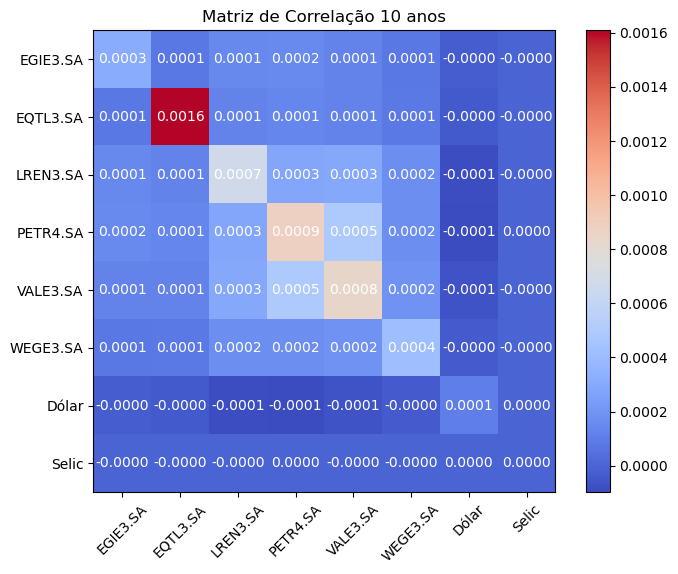

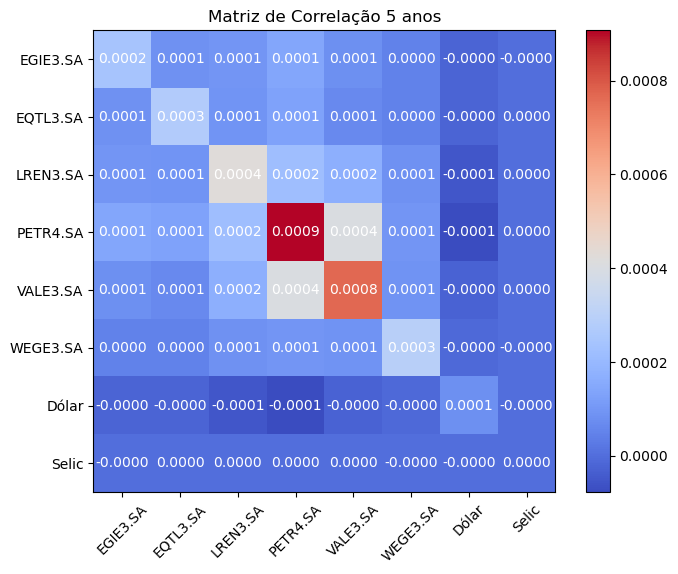

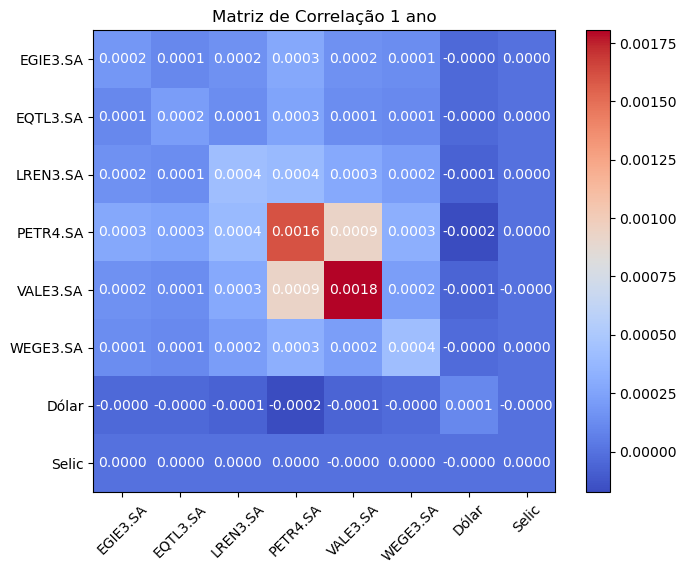

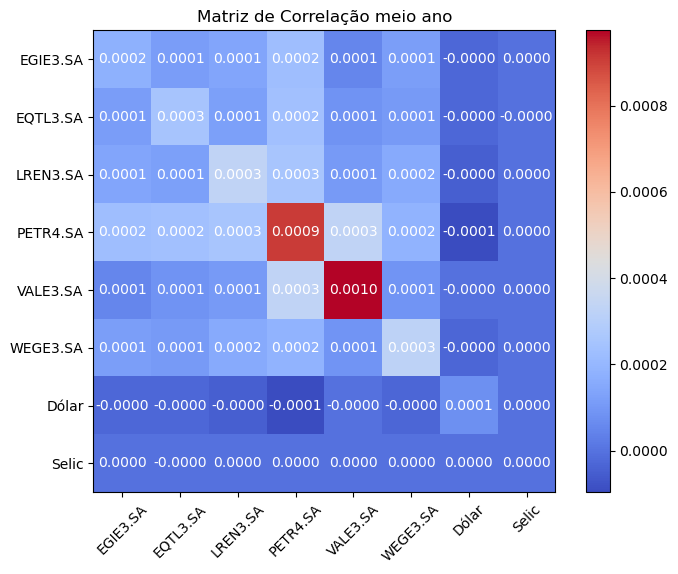

In [667]:
# Como a selic ja esta como retorno percentual diario ela entra no banco de dados de retorno???
# Duvida:  essa e a maneira correta de apresentar retorno da selic????

# Retornos covariancia de 10 anos
retornos = precos.pct_change().apply(lambda x: np.log(1+x)).dropna()
retornos = retornos.merge(df_selic.astype(float), left_index=True, right_index=True)
media_retornos = retornos.mean()
matriz_cov = retornos.cov()
display(retornos)
# Retornos covariancia de 5 anos
retornos1 = precos1.pct_change().apply(lambda x: np.log(1+x)).dropna()
retornos1 = retornos1.merge(df_selic.astype(float), left_index=True, right_index=True)
media_retornos1 = retornos1.mean()
matriz_cov1 = retornos1.cov()
display(retornos1)
# Retornos covariancia de 1 ano
retornos2 = precos2.pct_change().apply(lambda x: np.log(1+x)).dropna()
retornos2 = retornos2.merge(df_selic.astype(float), left_index=True, right_index=True)
media_retornos2 = retornos2.mean()
matriz_cov2 = retornos2.cov()
display(retornos2)
# Retornos covariancia de 1/2 ano
retornos4 = precos4.pct_change().apply(lambda x: np.log(1+x)).dropna()
retornos4 = retornos4.merge(df_selic.astype(float), left_index=True, right_index=True)
media_retornos4 = retornos4.mean()
matriz_cov4 = retornos4.cov()
display(retornos4)



plt.figure(figsize=(8, 6))
plt.imshow(matriz_cov, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov)), matriz_cov.columns, rotation=45)
plt.yticks(range(len(matriz_cov)), matriz_cov.columns)
plt.title('Matriz de Correlação 10 anos')

for i in range(len(matriz_cov)):
    for j in range(len(matriz_cov)):
        plt.text(i, j, f'{matriz_cov.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov)), matriz_cov.columns, rotation=45)
plt.yticks(range(len(matriz_cov)), matriz_cov.columns)
plt.show()



plt.figure(figsize=(8, 6))
plt.imshow(matriz_cov1, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov1)), matriz_cov1.columns, rotation=45)
plt.yticks(range(len(matriz_cov1)), matriz_cov1.columns)
plt.title('Matriz de Correlação 5 anos')

for i in range(len(matriz_cov1)):
    for j in range(len(matriz_cov1)):
        plt.text(i, j, f'{matriz_cov1.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov1)), matriz_cov1.columns, rotation=45)
plt.yticks(range(len(matriz_cov1)), matriz_cov1.columns)
plt.show()



plt.figure(figsize=(8, 6))
plt.imshow(matriz_cov2, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov2)), matriz_cov2.columns, rotation=45)
plt.yticks(range(len(matriz_cov2)), matriz_cov2.columns)
plt.title('Matriz de Correlação 1 ano')

for i in range(len(matriz_cov2)):
    for j in range(len(matriz_cov2)):
        plt.text(i, j, f'{matriz_cov2.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov2)), matriz_cov2.columns, rotation=45)
plt.yticks(range(len(matriz_cov2)), matriz_cov2.columns)
plt.show()




plt.figure(figsize=(8, 6))
plt.imshow(matriz_cov4, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov4)), matriz_cov4.columns, rotation=45)
plt.yticks(range(len(matriz_cov4)), matriz_cov4.columns)
plt.title('Matriz de Correlação meio ano')

for i in range(len(matriz_cov4)):
    for j in range(len(matriz_cov4)):
        plt.text(i, j, f'{matriz_cov4.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov4)), matriz_cov4.columns, rotation=45)
plt.yticks(range(len(matriz_cov4)), matriz_cov4.columns)
plt.show()

In [668]:
# Duvida: Quantidade de carteiras foi sem razºao nenhuma, existe algum estudo devo colocar mais

numero_carteiras = 100000
lista_acoes = lista_acoes + ["Selic", "Dolar"]


# Duvida: ponto de melhoria, quando olho no grafico percebo que os valores nao estao tao distribuidos, perto da fronteira eficiente, existe alguma forma de ajustar
# Duvida: adicionalmente precisava deixar de maneira randomica mas que os resultados fossem sempre os mesmos, para poder comparar per+iodos diferentes.Sugestoes
# simulação de carteiras de 10 anos
tabela_retornos_esperados = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas = np.zeros(numero_carteiras)
tabela_sharpe = np.zeros(numero_carteiras)
tabela_pesos = np.zeros((numero_carteiras, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos = np.random.random(len(lista_acoes))
    pesos = pesos/np.sum(pesos)
    tabela_pesos[k, :] = pesos
    
    tabela_retornos_esperados[k] = np.sum(media_retornos * pesos * 252)
    tabela_volatilidades_esperadas[k] = np.sqrt(np.dot(pesos.T, np.dot(matriz_cov*252, pesos)))
    
    tabela_sharpe[k] = tabela_retornos_esperados[k]/tabela_volatilidades_esperadas[k]
    
    
# simulação de carteiras de 5 anos    
tabela_retornos_esperados1 = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas1 = np.zeros(numero_carteiras)
tabela_sharpe1 = np.zeros(numero_carteiras)
tabela_pesos1 = np.zeros((numero_carteiras, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos1 = np.random.random(len(lista_acoes))
    pesos1 = pesos1/np.sum(pesos1)
    tabela_pesos1[k, :] = pesos1
    
    tabela_retornos_esperados1[k] = np.sum(media_retornos1 * pesos1 * 252)
    tabela_volatilidades_esperadas1[k] = np.sqrt(np.dot(pesos1.T, np.dot(matriz_cov1*252, pesos1)))
    
    tabela_sharpe1[k] = tabela_retornos_esperados1[k]/tabela_volatilidades_esperadas1[k]

    
# simulação de carteiras de 1 anos    
tabela_retornos_esperados2 = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas2 = np.zeros(numero_carteiras)
tabela_sharpe2 = np.zeros(numero_carteiras)
tabela_pesos2 = np.zeros((numero_carteiras, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos2 = np.random.random(len(lista_acoes))
    pesos2 = pesos2/np.sum(pesos2)
    tabela_pesos2[k, :] = pesos2
    
    tabela_retornos_esperados2[k] = np.sum(media_retornos2 * pesos2 * 252)
    tabela_volatilidades_esperadas2[k] = np.sqrt(np.dot(pesos2.T, np.dot(matriz_cov2*252, pesos2)))
    
    tabela_sharpe2[k] = tabela_retornos_esperados2[k]/tabela_volatilidades_esperadas2[k]

    
# Em uma carteira de 6 meses sera que devo considerar 252 dias (um ano) mesmo ou apenas 126????
    
# simulação de carteiras de 1/2 anos    
tabela_retornos_esperados4 = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas4 = np.zeros(numero_carteiras)
tabela_sharpe4 = np.zeros(numero_carteiras)
tabela_pesos4 = np.zeros((numero_carteiras, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos4 = np.random.random(len(lista_acoes))
    pesos4 = pesos4/np.sum(pesos4)
    tabela_pesos4[k, :] = pesos4
    
    tabela_retornos_esperados4[k] = np.sum(media_retornos4 * pesos4 * 252)
    tabela_volatilidades_esperadas4[k] = np.sqrt(np.dot(pesos4.T, np.dot(matriz_cov4*252, pesos4)))
    
    tabela_sharpe4[k] = tabela_retornos_esperados4[k]/tabela_volatilidades_esperadas4[k]


In [669]:
# Sharpe maximo 10 anos
indice_do_sharpe_maximo = tabela_sharpe.argmax()
display(tabela_pesos[indice_do_sharpe_maximo])
# Sharpe maximo 5 anos
indice_do_sharpe_maximo1 = tabela_sharpe1.argmax()
display(tabela_pesos1[indice_do_sharpe_maximo1])
# Sharpe maximo 1 ano
indice_do_sharpe_maximo2 = tabela_sharpe2.argmax()
display(tabela_pesos2[indice_do_sharpe_maximo2])
# Sharpe maximo 1/2 ano
indice_do_sharpe_maximo4 = tabela_sharpe4.argmax()
display(tabela_pesos4[indice_do_sharpe_maximo4])

array([0.19450652, 0.00051334, 0.04441401, 0.01111878, 0.02857938,
       0.06659549, 0.35488232, 0.29939016])

array([0.0165679 , 0.00629579, 0.07282983, 0.02551639, 0.02490653,
       0.02737606, 0.37711476, 0.44939274])

array([0.08268452, 0.39705391, 0.02284327, 0.01338372, 0.03914889,
       0.02311445, 0.01545272, 0.40631853])

array([0.01488181, 0.00943688, 0.01980828, 0.01531814, 0.08252481,
       0.08617164, 0.15445358, 0.61740485])

In [670]:
# voltando tabela de logaritimo para retornos aritimetico 10 anos
tabela_retornos_esperados_arit = np.exp(tabela_retornos_esperados) - 1
# voltando tabela de logaritimo para retornos aritimetico 5 anos
tabela_retornos_esperados_arit1 = np.exp(tabela_retornos_esperados1) - 1
# voltando tabela de logaritimo para retornos aritimetico 1 ano
tabela_retornos_esperados_arit2 = np.exp(tabela_retornos_esperados2) - 1
# voltando tabela de logaritimo para retornos aritimetico 1/2 ano
tabela_retornos_esperados_arit4 = np.exp(tabela_retornos_esperados4) - 1

In [671]:
# Duvida: no grafico percebe se fronteira eficiente descolada das carteiras, tem algo errado aqui sera???
# Duvida: Por que para alguns periodos fronteira eficiente e uma linha reta e nao tem uma curva, esta certo sera???

# Montando fronteira eficiente 10 anos
eixo_y_fronteira_eficiente = np.linspace(tabela_retornos_esperados_arit.min(),
                                       tabela_retornos_esperados_arit.max(),50)

def pegando_retorno(peso_teste):
    peso_teste = np.array(peso_teste)
    retorno = np.sum(media_retornos*peso_teste)*252
    retorno = np.exp(retorno) - 1
    return retorno

def checando_soma_pesos(peso_teste):
    
    return np.sum(peso_teste)-1

def pegando_vol(peso_teste):
    peso_teste = np.array(peso_teste)
    vol= np.sqrt(np.dot(peso_teste.T, np.dot(matriz_cov*252, peso_teste)))
    
    return vol

peso_inicial = [1/len(lista_acoes)] * len(lista_acoes)
limites = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente = []

for retorno_possivel in eixo_y_fronteira_eficiente:
    restricoes = ({'type':'eq', 'fun':checando_soma_pesos},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno(w) - retorno_possivel})
    
    result = minimize(pegando_vol, peso_inicial, method='SLSQP', bounds=limites, constraints=restricoes)
    eixo_x_fronteira_eficiente.append(result['fun'])
    
    
# Montando fronteira eficiente 5 anos    
eixo_y_fronteira_eficiente1 = np.linspace(tabela_retornos_esperados_arit1.min(),
                                       tabela_retornos_esperados_arit1.max(),50)

def pegando_retorno1(peso_teste1):
    peso_teste1 = np.array(peso_teste1)
    retorno1 = np.sum(media_retornos1*peso_teste1)*252
    retorno1 = np.exp(retorno1) - 1
    return retorno1

def checando_soma_pesos1(peso_teste1):
    
    return np.sum(peso_teste1)-1

def pegando_vol1(peso_teste1):
    peso_teste1 = np.array(peso_teste1)
    vol1= np.sqrt(np.dot(peso_teste1.T, np.dot(matriz_cov1*252, peso_teste1)))
    
    return vol1

peso_inicial1 = [1/len(lista_acoes)] * len(lista_acoes)
limites1 = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente1 = []

for retorno_possivel1 in eixo_y_fronteira_eficiente1:
    restricoes1 = ({'type':'eq', 'fun':checando_soma_pesos1},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno1(w) - retorno_possivel1})
    
    result1 = minimize(pegando_vol1, peso_inicial1, method='SLSQP', bounds=limites1, constraints=restricoes1)
    eixo_x_fronteira_eficiente1.append(result1['fun'])
    
    
# Montando fronteira eficiente 1 ano    
eixo_y_fronteira_eficiente2 = np.linspace(tabela_retornos_esperados_arit2.min(),
                                       tabela_retornos_esperados_arit2.max(),50)

def pegando_retorno2(peso_teste2):
    peso_teste2 = np.array(peso_teste2)
    retorno2 = np.sum(media_retornos2*peso_teste2)*252
    retorno2 = np.exp(retorno2) - 1
    return retorno2

def checando_soma_pesos2(peso_teste2):
    
    return np.sum(peso_teste2)-1

def pegando_vol2(peso_teste2):
    peso_teste2 = np.array(peso_teste2)
    vol2= np.sqrt(np.dot(peso_teste2.T, np.dot(matriz_cov2*252, peso_teste2)))
    
    return vol2

peso_inicial2 = [1/len(lista_acoes)] * len(lista_acoes)
limites2 = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente2 = []

for retorno_possivel2 in eixo_y_fronteira_eficiente2:
    restricoes2 = ({'type':'eq', 'fun':checando_soma_pesos2},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno2(w) - retorno_possivel2})
    
    result2 = minimize(pegando_vol2, peso_inicial2, method='SLSQP', bounds=limites2, constraints=restricoes2)
    eixo_x_fronteira_eficiente2.append(result2['fun'])

    

# Em uma carteira de 6 meses sera que devo considerar 252 dias (um ano) mesmo ou apenas 126????
# Montando fronteira eficiente 1/2 ano    
eixo_y_fronteira_eficiente4 = np.linspace(tabela_retornos_esperados_arit4.min(),
                                       tabela_retornos_esperados_arit4.max(),50)

def pegando_retorno4(peso_teste4):
    peso_teste4 = np.array(peso_teste4)
    retorno4 = np.sum(media_retornos4*peso_teste4)*252
    retorno4 = np.exp(retorno4) - 1
    return retorno4

def checando_soma_pesos4(peso_teste4):
    
    return np.sum(peso_teste4)-1

def pegando_vol4(peso_teste4):
    peso_teste4 = np.array(peso_teste4)
    vol4= np.sqrt(np.dot(peso_teste4.T, np.dot(matriz_cov4*252, peso_teste4)))
    
    return vol4

peso_inicial4 = [1/len(lista_acoes)] * len(lista_acoes)
limites4 = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente4 = []

for retorno_possivel4 in eixo_y_fronteira_eficiente4:
    restricoes4 = ({'type':'eq', 'fun':checando_soma_pesos4},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno4(w) - retorno_possivel4})
    
    result4 = minimize(pegando_vol4, peso_inicial4, method='SLSQP', bounds=limites4, constraints=restricoes4)
    eixo_x_fronteira_eficiente4.append(result4['fun'])
    

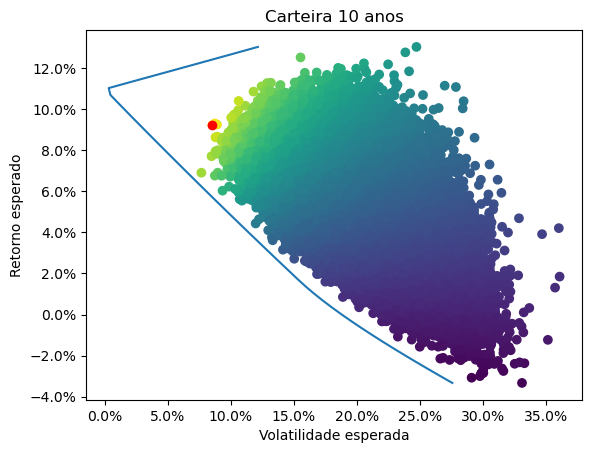

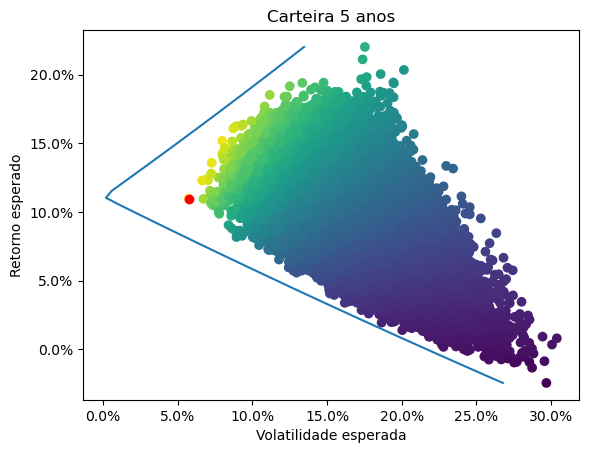

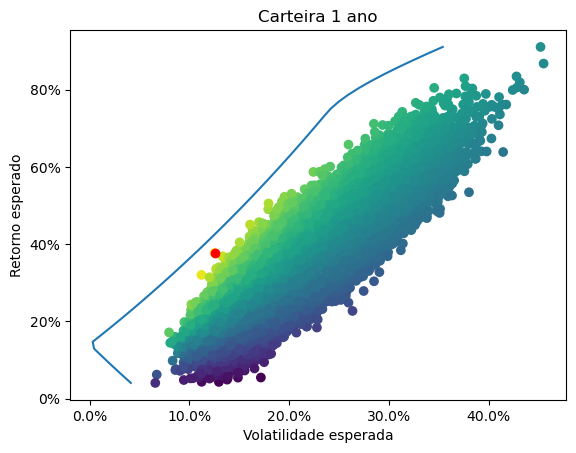

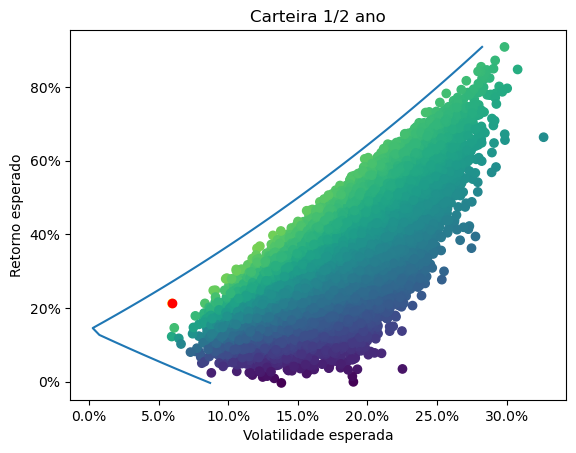

In [672]:
# Plotando grafico retorno vs volatilidade 10 anos
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas, tabela_retornos_esperados_arit, c= tabela_sharpe)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
ax.set_title("Carteira 10 anos")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.scatter(tabela_volatilidades_esperadas[indice_do_sharpe_maximo],
          tabela_retornos_esperados_arit[indice_do_sharpe_maximo], c = "red")
ax.plot(eixo_x_fronteira_eficiente, eixo_y_fronteira_eficiente)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()

# Plotando grafico retorno vs volatilidade 5 anos
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas1, tabela_retornos_esperados_arit1, c= tabela_sharpe1)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
ax.set_title("Carteira 5 anos")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.scatter(tabela_volatilidades_esperadas1[indice_do_sharpe_maximo1],
          tabela_retornos_esperados_arit1[indice_do_sharpe_maximo1], c = "red")
ax.plot(eixo_x_fronteira_eficiente1, eixo_y_fronteira_eficiente1)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()

# Plotando grafico retorno vs volatilidade 1 ano
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas2, tabela_retornos_esperados_arit2, c= tabela_sharpe2)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
ax.set_title("Carteira 1 ano")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.scatter(tabela_volatilidades_esperadas2[indice_do_sharpe_maximo2],
          tabela_retornos_esperados_arit2[indice_do_sharpe_maximo2], c = "red")
ax.plot(eixo_x_fronteira_eficiente2, eixo_y_fronteira_eficiente2)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()


# Plotando grafico retorno vs volatilidade 1/2 ano
fig, ax = plt.subplots()

ax.scatter(tabela_volatilidades_esperadas4, tabela_retornos_esperados_arit4, c= tabela_sharpe4)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
ax.set_title("Carteira 1/2 ano")
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.scatter(tabela_volatilidades_esperadas4[indice_do_sharpe_maximo4],
          tabela_retornos_esperados_arit4[indice_do_sharpe_maximo4], c = "red")
ax.plot(eixo_x_fronteira_eficiente4, eixo_y_fronteira_eficiente4)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

plt.show()

In [673]:
# Nos graficos é possivel observar algumas coisas estranhas
# dependendo do periodo analisado a fronteira eficiente vira uma reta, normal esse comportamento?
# Fronteira eficiente fica muito longe das carteiras, tem forma de distribuir melhor as carteiras (pesos)?
# a carteira de meio ano tem um retorno muito alto, será que é por que usamos um retorno de um ano (252 dias) para um peíodo analisado de 6 meses? ou está correta essa simplificação?
# Aceitos sugestoes no codigo também para simplificar

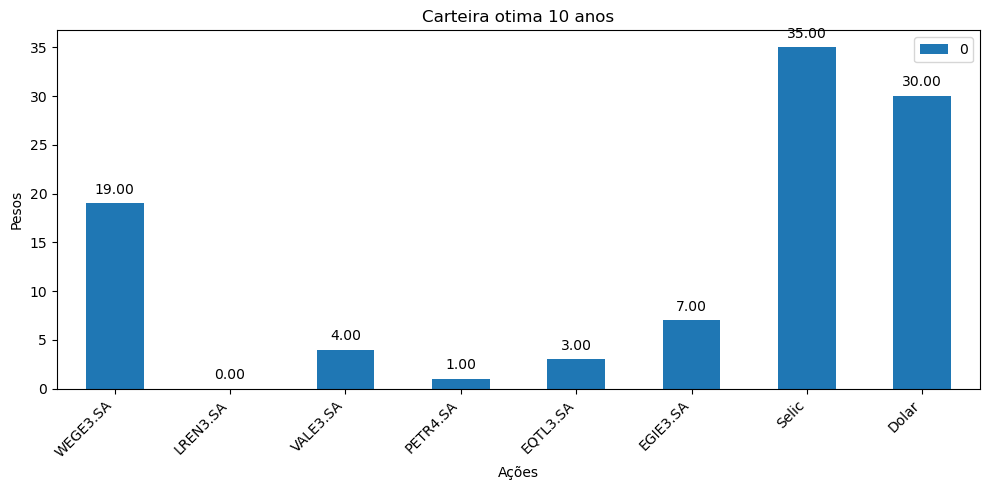

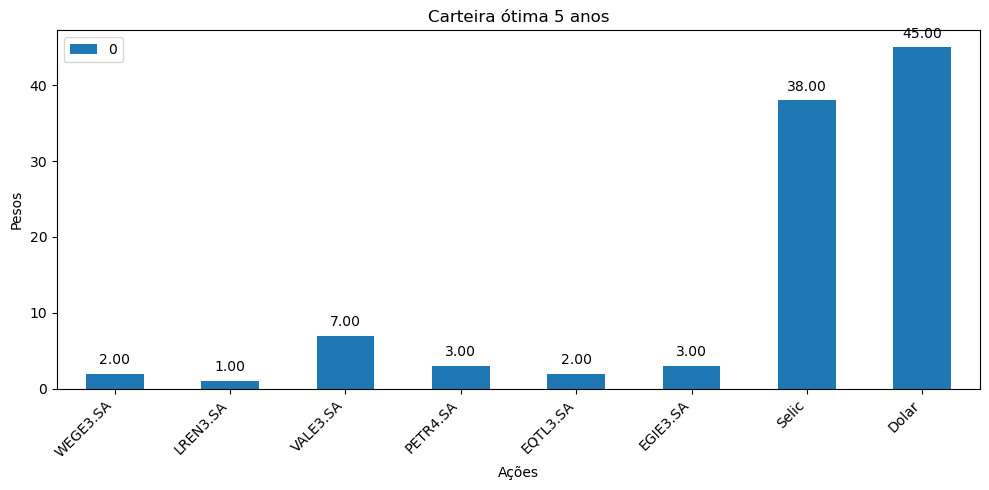

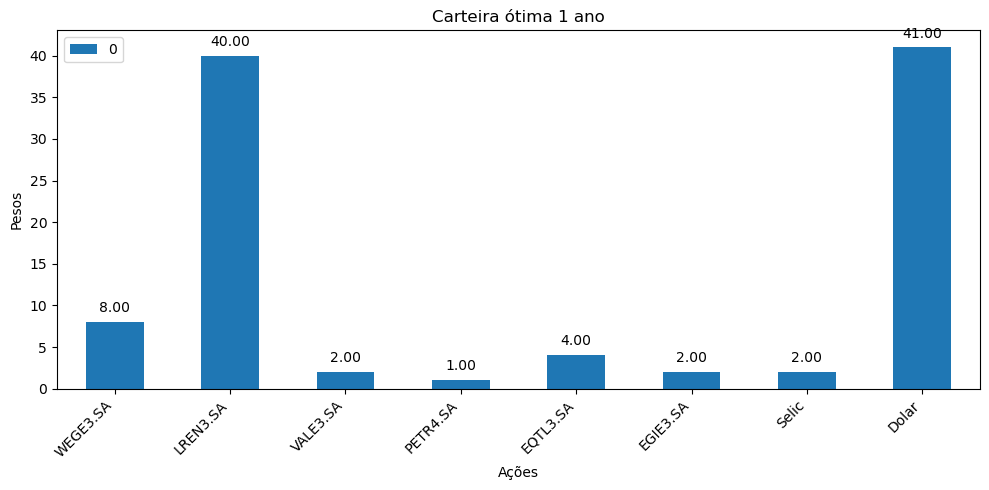

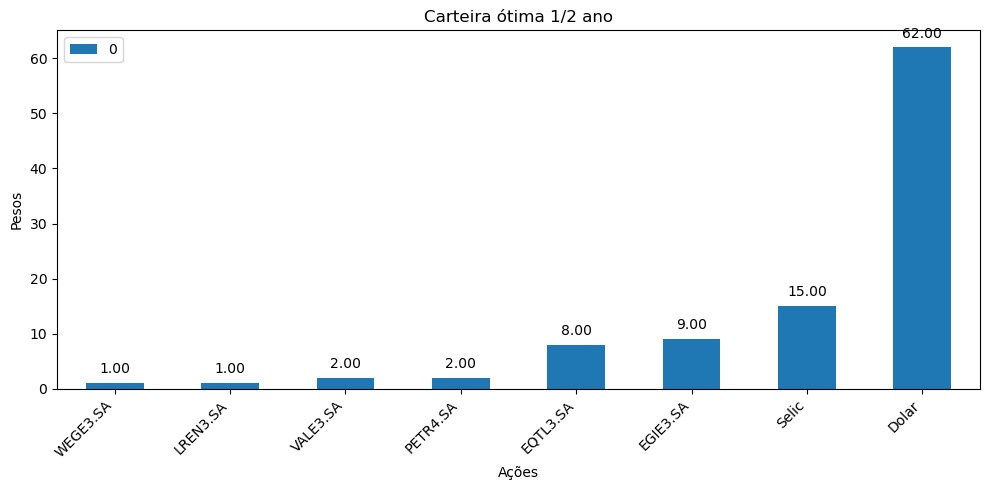

,Tempo em anos,Volatilidade,Retorno,Indice Sharpe
0,10.0,0.085462,0.092170,99153
1,5.0,0.057314,0.109739,17872
2,1.0,0.125320,0.377235,38642
3,0.5,0.059640,0.212573,14291


In [674]:
#Pesos por ativo na carteira de sharpe maximo 10 anos
Melhor_peso = tabela_pesos[indice_do_sharpe_maximo]
Melhor_peso = tuple(Melhor_peso)
Melhor_peso = [round(numero*100, 0) for numero in Melhor_peso]
lista_acoes = tuple(lista_acoes)
#Pesos por ativo na carteira de sharpe maximo 5 anos
Melhor_peso1 = tabela_pesos1[indice_do_sharpe_maximo1]
Melhor_peso1 = tuple(Melhor_peso1)
Melhor_peso1 = [round(numero*100, 0) for numero in Melhor_peso1]
lista_acoes = tuple(lista_acoes)
#Pesos por ativo na carteira de sharpe maximo 1 ano
Melhor_peso2 = tabela_pesos2[indice_do_sharpe_maximo2]
Melhor_peso2 = tuple(Melhor_peso2)
Melhor_peso2 = [round(numero*100, 0) for numero in Melhor_peso2]
lista_acoes = tuple(lista_acoes)
#Pesos por ativo na carteira de sharpe maximo 1/2 ano
Melhor_peso4 = tabela_pesos4[indice_do_sharpe_maximo4]
Melhor_peso4 = tuple(Melhor_peso4)
Melhor_peso4 = [round(numero*100, 0) for numero in Melhor_peso4]
lista_acoes = tuple(lista_acoes)


#Grafico carteira de sharpe maximo 10 anos
Carteira = pd.DataFrame(Melhor_peso,lista_acoes)

ax=Carteira.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira otima 10 anos")
ax.set_xticklabels(Carteira.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#Grafico carteira de sharpe maximo 10 anos
Carteira1 = pd.DataFrame(Melhor_peso1,lista_acoes)

ax=Carteira1.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira ótima 5 anos")
ax.set_xticklabels(Carteira1.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#Grafico carteira de sharpe maximo 1 ano
Carteira2 = pd.DataFrame(Melhor_peso2,lista_acoes)

ax=Carteira2.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira ótima 1 ano")
ax.set_xticklabels(Carteira2.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#Grafico carteira de sharpe maximo 1/2 ano
Carteira4 = pd.DataFrame(Melhor_peso4,lista_acoes)

ax=Carteira4.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira ótima 1/2 ano")
ax.set_xticklabels(Carteira4.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()



# Tabela de retornos e volatilidades
Valores_finais = [
    {"Tempo em anos": 10,"Volatilidade": tabela_volatilidades_esperadas[indice_do_sharpe_maximo], "Retorno": tabela_retornos_esperados_arit[indice_do_sharpe_maximo], "Indice Sharpe": indice_do_sharpe_maximo},
    {"Tempo em anos": 5,"Volatilidade": tabela_volatilidades_esperadas1[indice_do_sharpe_maximo1], "Retorno": tabela_retornos_esperados_arit1[indice_do_sharpe_maximo1], "Indice Sharpe": indice_do_sharpe_maximo1},
    {"Tempo em anos": 1,"Volatilidade": tabela_volatilidades_esperadas2[indice_do_sharpe_maximo2], "Retorno": tabela_retornos_esperados_arit2[indice_do_sharpe_maximo2], "Indice Sharpe": indice_do_sharpe_maximo2},
    {"Tempo em anos": 1/2,"Volatilidade": tabela_volatilidades_esperadas4[indice_do_sharpe_maximo4], "Retorno": tabela_retornos_esperados_arit4[indice_do_sharpe_maximo4], "Indice Sharpe": indice_do_sharpe_maximo4},
]

tabela = pd.DataFrame(Valores_finais)
display (tabela)

In [675]:
Carteira.rename(columns={0:'10 Anos'},inplace=True)
Carteira1.rename(columns={0:'5 Anos'},inplace=True)
Carteira2.rename(columns={0:'1 Ano'},inplace=True)
Carteira4.rename(columns={0:'Meio Ano'},inplace=True)

Carteira = Carteira.transpose()
Carteira1 = Carteira1.transpose()
Carteira2 = Carteira2.transpose()
Carteira4 = Carteira4.transpose()

Carteira = Carteira.append(Carteira1)
Carteira = Carteira.append(Carteira2)
Carteira = Carteira.append(Carteira4)
display(Carteira)


C:\Users\rober\AppData\Local\Temp\ipykernel_15652\2411723977.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Carteira = Carteira.append(Carteira1)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\2411723977.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Carteira = Carteira.append(Carteira2)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\2411723977.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Carteira = Carteira.append(Carteira4)


,WEGE3.SA,LREN3.SA,VALE3.SA,PETR4.SA,EQTL3.SA,EGIE3.SA,Selic,Dolar
10 Anos,19.0,0.0,4.0,1.0,3.0,7.0,35.0,30.0
5 Anos,2.0,1.0,7.0,3.0,2.0,3.0,38.0,45.0
1 Ano,8.0,40.0,2.0,1.0,4.0,2.0,2.0,41.0
Meio Ano,1.0,1.0,2.0,2.0,8.0,9.0,15.0,62.0


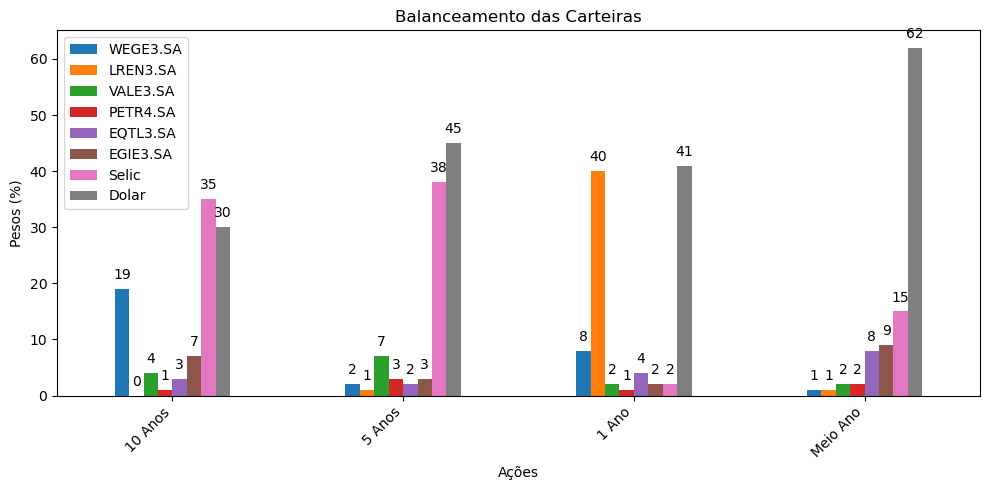

In [676]:
ax=Carteira.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos (%)")
ax.set_xlabel("Ações")
ax.set_title("Balanceamento das Carteiras")
ax.set_xticklabels(Carteira.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()



In [677]:
# A ideia a partir desse ponto é verificar onde as carteiras se posicionariam dentro de um novo grafico considerando 1 ano depois da analise
# Fiz simulações para 1 ano e depois 2 anos a partir da data final das carteiras anteriores (muda bastante coisa, o que demonstra a necessidade de rebalanciar a receita a cada x periodo de tempo)
# Duvida: estou fazendo um novo grafico considerando 1 ano de periodo de analise, sera que o ideal seria considerar todos os períodos anteriores novamente? 10 5 1 e meio ano?


# Segunda etapa da Analise é verificar o melhor desempenho entre as carteiras, qual teve mais retorno em um ano

In [678]:
# 10 anos
inicio310 = dt.date(ano-9, 1, 1)
final310 = dt.date(ano+1, 12, 31)
# 5 anos
inicio35 = dt.date(ano-4, 1, 1)
final35 = dt.date(ano+1, 12, 31)
# 1 ano
inicio3 = dt.date(ano+1, 1, 1)
final3 = dt.date(ano+1, 12, 31)
# 1/2 ano
inicio305 = dt.date(ano+1, 7, 1)
final305 = dt.date(ano+1, 12, 31)

data_inicial = str(inicio310)
data_final = str(final310)


In [679]:
lista_acoes = ["WEGE3", "LREN3","VALE3", "PETR4", "EQTL3", "EGIE3"]
lista_acoes = [acao + ".SA" for acao in lista_acoes]

precos3 = pdr.get_data_yahoo(lista_acoes, inicio3, final3)['Adj Close']
precos310 = pdr.get_data_yahoo(lista_acoes, inicio310, final310)['Adj Close']
precos35 = pdr.get_data_yahoo(lista_acoes, inicio35, final35)['Adj Close']
precos305 = pdr.get_data_yahoo(lista_acoes, inicio305, final305)['Adj Close']



# Definir os códigos das séries no Banco Central
codigo_selic = 11
codigo_dolar = 1


# Definir o período desejado (formato: AAAAMM)
periodo_inicio = "202201"
periodo_fim = "202201"

# Montar as URLs da API do Banco Central para as séries
url_selic = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_selic}/dados?formato=json&dataInicial={periodo_inicio}&dataFinal={periodo_fim}"
url_dolar = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_dolar}/dados?formato=json&dataInicial={periodo_inicio}&dataFinal={periodo_fim}"

# Fazer as requisições à API
response_selic = requests.get(url_selic)
dados_selic = response_selic.json()

response_dolar = requests.get(url_dolar)
dados_dolar = response_dolar.json()

# Converter os dados para DataFrames
df_selic = pd.DataFrame(dados_selic)
df_dolar = pd.DataFrame(dados_dolar)

# Converter as colunas de data para formato datetime
df_selic["data"] = pd.to_datetime(df_selic["data"], dayfirst=True)
df_dolar["data"] = pd.to_datetime(df_dolar["data"], dayfirst=True)

# Filtrar os dados para o período de 2012 a 2022
df_selic = df_selic[(df_selic["data"] >= data_inicial) & (df_selic["data"] <= data_final)]
df_dolar = df_dolar[(df_dolar["data"] >= data_inicial) & (df_dolar["data"] <= data_final)]

# Definir a data como índice
df_selic.set_index("data", inplace=True)
df_dolar.set_index("data", inplace=True)

# Renomear colunas
df_selic.rename(columns={"valor": "Selic"}, inplace=True)
df_dolar.rename(columns={"valor": "Dólar"}, inplace=True)

#retorno selic diario
df_selic = df_selic.astype(float)/100


# Juntar os DataFrames em um único DataFrame
precos3 = precos3.merge(df_dolar.astype(float), left_index=True, right_index=True)
precos310 = precos310.merge(df_dolar.astype(float), left_index=True, right_index=True)
precos35 = precos35.merge(df_dolar.astype(float), left_index=True, right_index=True)
precos305 = precos305.merge(df_dolar.astype(float), left_index=True, right_index=True)

# Exibir o DataFrame final
display(precos3)
display(precos310)
display(precos35)
display(precos305)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  6 of 6 completed


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2017-01-02,16.673311,9.587374,16.774582,5.198050,15.886398,5.246079,3.2729
2017-01-03,17.319201,9.568111,17.289280,5.495893,16.590065,5.510120,3.2632
2017-01-04,17.099117,9.604884,17.137047,5.495893,16.292116,5.378099,3.2333
2017-01-05,16.974724,9.587374,16.977560,5.584535,16.913374,5.364201,3.2129
2017-01-06,16.764217,9.543594,16.781837,5.552625,16.463276,5.409367,3.2057
...,...,...,...,...,...,...,...
2017-12-22,18.249287,11.319807,27.209881,5.584535,26.344208,8.593367,3.3209
2017-12-26,18.347483,11.500331,27.952698,5.662542,26.383924,8.745619,3.3200
2017-12-27,18.461189,11.636604,28.663233,5.690909,26.390549,8.742078,3.3031
2017-12-28,18.352655,11.618908,28.655149,5.708638,26.655378,8.536716,3.3080


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2007-01-02,5.638908,NaN,3.726094,7.001285,15.101518,1.394814,2.1342
2007-01-03,5.674172,NaN,3.708629,6.788408,14.362610,1.394814,2.1372
2007-01-04,5.670967,NaN,3.889111,6.636749,14.131699,1.394814,2.1429
2007-01-05,5.513885,NaN,3.772671,6.435004,13.531333,1.394814,2.1474
2007-01-08,5.613263,NaN,3.699313,6.510138,14.039336,1.394814,2.1505
...,...,...,...,...,...,...,...
2017-12-22,18.249287,11.319808,27.209879,5.584535,26.344206,8.593367,3.3209
2017-12-26,18.347486,11.500330,27.952703,5.662543,26.383928,8.745621,3.3200
2017-12-27,18.461189,11.636606,28.663227,5.690908,26.390551,8.742079,3.3031
2017-12-28,18.352652,11.618908,28.655155,5.708637,26.655378,8.536716,3.3080


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2012-01-02,11.127376,2.047526,6.610937,6.923899,21.032688,2.203966,1.8683
2012-01-03,11.019810,2.000918,6.585010,7.199310,21.968622,2.255936,1.8457
2012-01-04,11.149634,2.033062,6.516308,7.250710,22.117746,2.267746,1.8272
2012-01-05,11.316542,2.041097,6.737970,7.167185,21.526365,2.281921,1.8371
2012-01-06,11.383300,2.049133,6.831301,7.173610,21.341236,2.255936,1.8449
...,...,...,...,...,...,...,...
2017-12-22,18.249289,11.319806,27.209879,5.584537,26.344206,8.593366,3.3209
2017-12-26,18.347479,11.500330,27.952702,5.662542,26.383926,8.745618,3.3200
2017-12-27,18.461191,11.636606,28.663225,5.690908,26.390551,8.742079,3.3031
2017-12-28,18.352655,11.618907,28.655155,5.708635,26.655376,8.536714,3.3080


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2017-07-03,16.731133,9.661482,22.157812,4.382531,19.423223,6.305618,3.3015
2017-07-04,16.697014,9.680948,22.021091,4.407351,19.403570,6.330208,3.3050
2017-07-05,16.560509,9.698648,22.342794,4.329345,18.951563,6.361823,3.3193
2017-07-06,16.614134,9.677408,22.045221,4.315162,18.945009,6.224822,3.3064
2017-07-07,16.765261,9.665021,22.101515,4.230066,18.925358,6.309132,3.2895
...,...,...,...,...,...,...,...
2017-12-22,18.249289,11.319808,27.209875,5.584536,26.344202,8.593367,3.3209
2017-12-26,18.347486,11.500329,27.952702,5.662542,26.383926,8.745621,3.3200
2017-12-27,18.461185,11.636606,28.663231,5.690907,26.390549,8.742078,3.3031
2017-12-28,18.352652,11.618908,28.655151,5.708636,26.655382,8.536718,3.3080


In [680]:
display("10 ANOS")
precos310_c_selic = precos310.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos310_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos310_c_selic.describe()
inicial = pd.DataFrame(precos310_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos310_c_selic.iloc[len(precos310_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos310.iloc[len(precos310)-1]/precos310.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos310_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)


display("5 ANOS")
precos35_c_selic = precos35.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos35_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos35_c_selic.describe()
inicial = pd.DataFrame(precos35_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos35_c_selic.iloc[len(precos35_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos35.iloc[len(precos35)-1]/precos35.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos35_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)


display("1 ANO")
precos3_c_selic = precos3.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos3_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos3_c_selic.describe()
inicial = pd.DataFrame(precos3_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos3_c_selic.iloc[len(precos3_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos3.iloc[len(precos3)-1]/precos3.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos3_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)



display("0,5 ANOS")
precos305_c_selic = precos305.merge(df_selic.astype(float)*100, left_index=True, right_index=True)
precos305_c_selic.rename(columns={'Selic':"TaxaSelic"},inplace=True)
summary = precos305_c_selic.describe()
inicial = pd.DataFrame(precos305_c_selic.iloc[0])
inicial = inicial.transpose()

final = pd.DataFrame(precos305_c_selic.iloc[len(precos305_c_selic)-1])
final = final.transpose()

inicial_final = inicial.append(final)
inicial.rename(columns={0:'Inicial'},inplace=True)

retorno_total = (precos305.iloc[len(precos305)-1]/precos305.iloc[0]-1)*100
retorno_total['TaxaSelic'] = precos305_c_selic.sum().TaxaSelic
retorno_total = pd.DataFrame(retorno_total)
retorno_total.rename(columns={0:'Retorno no período (%)'},inplace=True)

retorno_total= retorno_total.transpose()

adicionais = inicial_final.append(retorno_total)
summary = summary.append(adicionais)
summary= summary.style.format('{:.2f}')
display(summary)


'10 ANOS'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,2722.00,2413.00,2722.00,2722.00,2722.00,2722.00,2722.00,2722.00
mean,11.70,4.26,9.40,6.80,19.14,3.45,2.34,0.04
std,4.26,2.84,6.12,2.45,5.36,1.74,0.67,0.01
min,5.00,1.21,1.47,1.49,5.42,1.08,1.53,0.03
25%,7.24,2.13,4.56,5.25,16.08,2.06,1.79,0.03
50%,12.86,3.06,7.90,6.52,19.46,2.62,2.08,0.04
75%,15.25,5.81,11.88,8.21,22.77,4.93,3.04,0.05
max,19.86,11.70,30.30,15.11,33.53,8.75,4.19,0.05
2007-01-02 00:00:00,5.64,nan,3.73,7.00,15.10,1.39,2.13,0.05
2017-12-29 00:00:00,18.35,11.62,28.66,5.71,26.66,8.54,3.31,0.03


'5 ANOS'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,1484.00,1484.00,1484.00,1484.00,1484.00,1484.00,1484.00,1484.00
mean,15.28,5.62,13.37,5.21,16.61,4.65,2.75,0.04
std,1.89,2.86,5.62,1.50,4.50,1.50,0.65,0.01
min,10.79,1.89,6.52,1.49,5.42,2.15,1.70,0.03
25%,13.99,3.26,9.18,4.32,12.25,3.41,2.18,0.03
50%,15.07,4.42,10.64,5.43,17.82,4.76,2.64,0.04
75%,16.61,8.55,16.36,6.27,20.00,5.62,3.25,0.05
max,19.86,11.70,30.30,8.71,26.66,8.75,4.19,0.05
2012-01-02 00:00:00,11.13,2.05,6.61,6.92,21.03,2.20,1.87,0.04
2017-12-29 00:00:00,18.35,11.62,28.66,5.71,26.66,8.54,3.31,0.03


'1 ANO'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:73: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,248.00,248.00,248.00,248.00,248.00,248.00,248.00,248.00
mean,17.52,10.35,23.30,5.17,20.29,6.80,3.19,0.04
std,0.88,0.70,3.95,0.47,2.24,0.92,0.07,0.01
min,15.65,8.99,16.60,4.13,15.89,5.20,3.05,0.03
25%,16.84,9.79,20.23,4.79,18.50,6.02,3.13,0.03
50%,17.44,10.22,22.69,5.26,20.36,6.67,3.17,0.04
75%,18.29,10.92,27.37,5.56,21.60,7.62,3.26,0.05
max,19.38,11.70,30.30,6.18,26.66,8.75,3.38,0.05
2017-01-02 00:00:00,16.67,9.59,16.77,5.20,15.89,5.25,3.27,0.05
2017-12-29 00:00:00,18.35,11.62,28.66,5.71,26.66,8.54,3.31,0.03


'0,5 ANOS'

C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:90: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inicial_final = inicial.append(final)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:100: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  adicionais = inicial_final.append(retorno_total)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\1415543850.py:101: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append(adicionais)


,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar,TaxaSelic
count,125.00,125.00,125.00,125.00,125.00,125.00,125.00,125.00
mean,18.12,10.85,26.59,5.26,21.76,7.54,3.20,0.03
std,0.70,0.56,2.34,0.50,1.79,0.62,0.07,0.00
min,16.56,9.66,22.02,4.23,18.67,6.22,3.09,0.03
25%,17.65,10.57,24.33,4.77,20.52,6.91,3.15,0.03
50%,18.29,10.92,27.35,5.41,21.47,7.61,3.18,0.03
75%,18.61,11.33,28.31,5.67,22.99,8.04,3.27,0.03
max,19.38,11.70,30.30,6.18,26.66,8.75,3.33,0.04
2017-07-03 00:00:00,16.73,9.66,22.16,4.38,19.42,6.31,3.30,0.04
2017-12-29 00:00:00,18.35,11.62,28.66,5.71,26.66,8.54,3.31,0.03


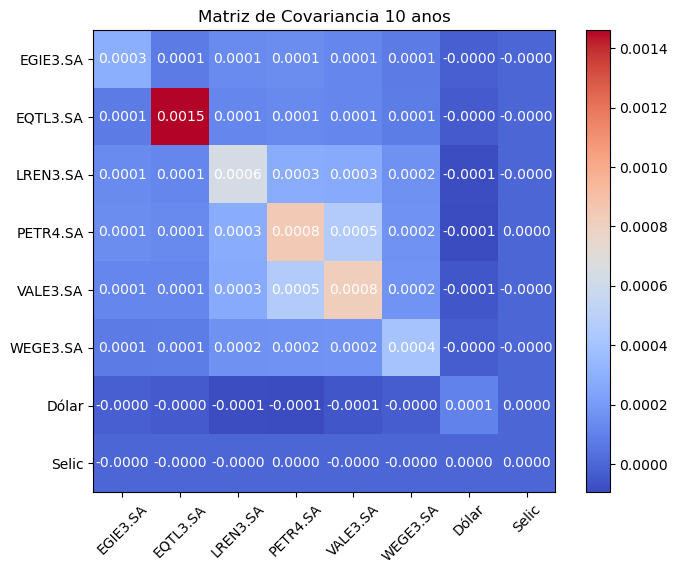

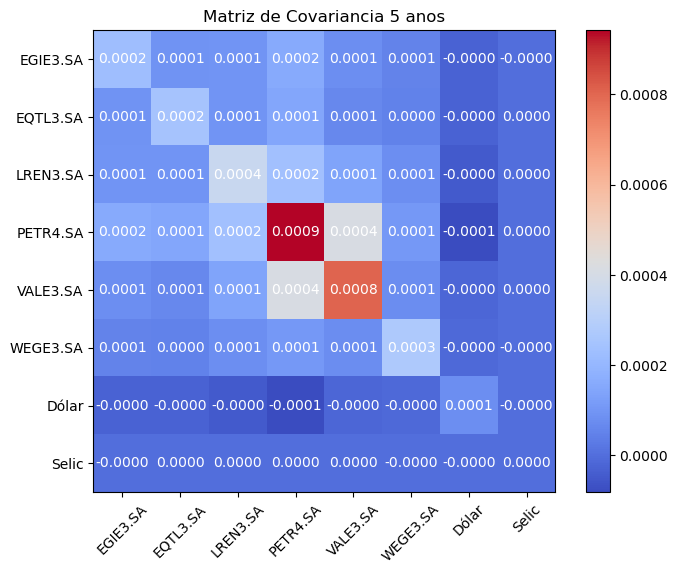

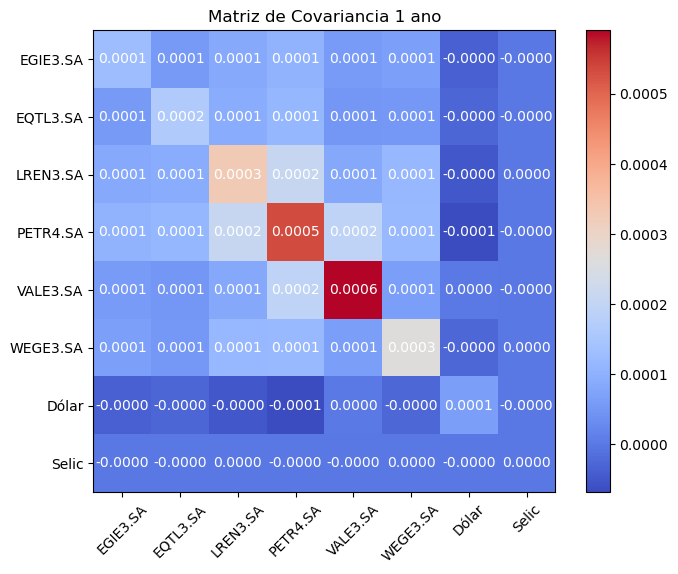

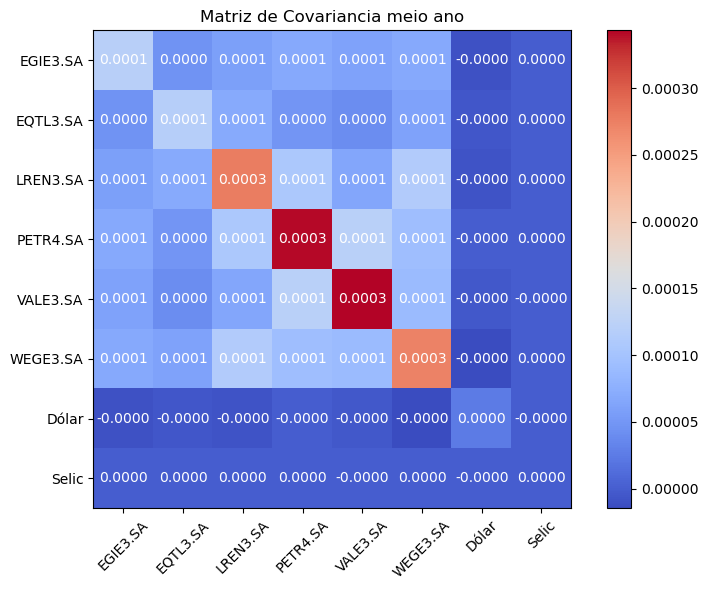

In [681]:
#detalhes
retornos3 = precos3.pct_change().apply(lambda x: np.log(1+x)).dropna()

retornos3 = retornos3.merge(df_selic, left_index=True, right_index=True)
media_retornos3 = retornos3.mean()
matriz_cov3 = retornos3.cov()


retornos310 = precos310.pct_change().apply(lambda x: np.log(1+x)).dropna()
retornos310 = retornos310.merge(df_selic, left_index=True, right_index=True)
media_retornos310 = retornos310.mean()
matriz_cov310 = retornos310.cov()

retornos35 = precos35.pct_change().apply(lambda x: np.log(1+x)).dropna()
retornos35 = retornos35.merge(df_selic, left_index=True, right_index=True)
media_retornos35 = retornos35.mean()
matriz_cov35 = retornos35.cov()

retornos305 = precos305.pct_change().apply(lambda x: np.log(1+x)).dropna()
retornos305 = retornos305.merge(df_selic, left_index=True, right_index=True)
media_retornos305 = retornos305.mean()
matriz_cov305 = retornos305.cov()




fig, axs = plt.subplots(figsize=(8, 6))
plt.imshow(matriz_cov310, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov310)), matriz_cov310.columns, rotation=45)
plt.yticks(range(len(matriz_cov310)), matriz_cov310.columns)
plt.title('Matriz de Covariancia 10 anos')

for i in range(len(matriz_cov310)):
    for j in range(len(matriz_cov310)):
        plt.text(i, j, f'{matriz_cov310.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov310)), matriz_cov310.columns, rotation=45)
plt.yticks(range(len(matriz_cov310)), matriz_cov310.columns)
plt.show()



plt.figure(figsize=(8, 6))
plt.imshow(matriz_cov35, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov35)), matriz_cov35.columns, rotation=45)
plt.yticks(range(len(matriz_cov35)), matriz_cov35.columns)
plt.title('Matriz de Covariancia 5 anos')

for i in range(len(matriz_cov35)):
    for j in range(len(matriz_cov35)):
        plt.text(i, j, f'{matriz_cov35.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov35)), matriz_cov35.columns, rotation=45)
plt.yticks(range(len(matriz_cov35)), matriz_cov35.columns)
plt.show()



plt.figure(figsize=(8, 6))
plt.imshow(matriz_cov3, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov3)), matriz_cov3.columns, rotation=45)
plt.yticks(range(len(matriz_cov3)), matriz_cov3.columns)
plt.title('Matriz de Covariancia 1 ano')

for i in range(len(matriz_cov3)):
    for j in range(len(matriz_cov3)):
        plt.text(i, j, f'{matriz_cov3.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov3)), matriz_cov3.columns, rotation=45)
plt.yticks(range(len(matriz_cov3)), matriz_cov3.columns)
plt.show()




plt.figure(figsize=(8, 6))
plt.imshow(matriz_cov305, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(matriz_cov305)), matriz_cov305.columns, rotation=45)
plt.yticks(range(len(matriz_cov305)), matriz_cov305.columns)
plt.title('Matriz de Covariancia meio ano')

for i in range(len(matriz_cov305)):
    for j in range(len(matriz_cov305)):
        plt.text(i, j, f'{matriz_cov305.iloc[i, j]:.4f}', ha='center', va='center', color='w')

plt.xticks(range(len(matriz_cov305)), matriz_cov305.columns, rotation=45)
plt.yticks(range(len(matriz_cov305)), matriz_cov305.columns)
plt.tight_layout()
plt.show()

In [682]:
# Acredito que o ideal seria usar sempre a mesma semente para simular as carteiras, nao seria???
#1 Ano

numero_carteiras = 100000
lista_acoes = lista_acoes + ["Selic", "Dolar"]
tabela_retornos_esperados3 = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas3 = np.zeros(numero_carteiras)
tabela_sharpe3 = np.zeros(numero_carteiras)
tabela_pesos3 = np.zeros((numero_carteiras+4, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos3 = np.random.random(len(lista_acoes))
    pesos3 = pesos3/np.sum(pesos3)
    tabela_pesos3[k, :] = pesos3
    
    tabela_retornos_esperados3[k] = np.sum(media_retornos3 * pesos3 * 252)
    tabela_volatilidades_esperadas3[k] = np.sqrt(np.dot(pesos3.T, np.dot(matriz_cov3*252, pesos3)))
    
    tabela_sharpe3 [k] = tabela_retornos_esperados3 [k]/tabela_volatilidades_esperadas3 [k]
    
    
    
# Carteira de 10, 5, 1 e 1/2 anos (Risco retorno)
retorno_10 = np.sum(media_retornos3 * tabela_pesos[indice_do_sharpe_maximo] * 252)
retorno_5 = np.sum(media_retornos3 * tabela_pesos1[indice_do_sharpe_maximo1] * 252)
retorno_1 = np.sum(media_retornos3 * tabela_pesos2[indice_do_sharpe_maximo2] * 252)
retorno_1_2 = np.sum(media_retornos3 * tabela_pesos4[indice_do_sharpe_maximo4] * 252)
tabela_retornos_esperados3 = np.append(tabela_retornos_esperados3,retorno_10)
tabela_retornos_esperados3 = np.append(tabela_retornos_esperados3,retorno_5)
tabela_retornos_esperados3 = np.append(tabela_retornos_esperados3,retorno_1)
tabela_retornos_esperados3 = np.append(tabela_retornos_esperados3,retorno_1_2)


vol_10 =np.sqrt(np.dot(tabela_pesos[indice_do_sharpe_maximo].T, np.dot(matriz_cov3*252, tabela_pesos[indice_do_sharpe_maximo])))
vol_5 = np.sqrt(np.dot(tabela_pesos1[indice_do_sharpe_maximo1].T, np.dot(matriz_cov3*252, tabela_pesos1[indice_do_sharpe_maximo1])))
vol_1 = np.sqrt(np.dot(tabela_pesos2[indice_do_sharpe_maximo2].T, np.dot(matriz_cov3*252, tabela_pesos2[indice_do_sharpe_maximo2])))
vol_1_2 = np.sqrt(np.dot(tabela_pesos4[indice_do_sharpe_maximo4].T, np.dot(matriz_cov3*252, tabela_pesos4[indice_do_sharpe_maximo4])))
tabela_volatilidades_esperadas3 = np.append(tabela_volatilidades_esperadas3,vol_10)
tabela_volatilidades_esperadas3 = np.append(tabela_volatilidades_esperadas3,vol_5)
tabela_volatilidades_esperadas3 = np.append(tabela_volatilidades_esperadas3,vol_1)
tabela_volatilidades_esperadas3 = np.append(tabela_volatilidades_esperadas3,vol_1_2)

sharpe_10 = retorno_10 /vol_10
sharpe_5 = retorno_5 /vol_5
sharpe_1 = retorno_1 /vol_1
sharpe_1_2 = retorno_1_2 /vol_1_2

indice_do_sharpe_maximo3 = tabela_sharpe3.argmax()
tabela_sharpe3= np.append(tabela_sharpe3, sharpe_10)
tabela_sharpe3= np.append(tabela_sharpe3, sharpe_5)
tabela_sharpe3= np.append(tabela_sharpe3, sharpe_1)
tabela_sharpe3= np.append(tabela_sharpe3, sharpe_1_2)
   
tabela_pesos3[100000]= tabela_pesos[indice_do_sharpe_maximo]
tabela_pesos3[100001]= tabela_pesos1[indice_do_sharpe_maximo1]
tabela_pesos3[100002]= tabela_pesos2[indice_do_sharpe_maximo2]
tabela_pesos3[100003]= tabela_pesos4[indice_do_sharpe_maximo4]

In [683]:
#10 anos
numero_carteiras = 100000
tabela_retornos_esperados310 = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas310 = np.zeros(numero_carteiras)
tabela_sharpe310 = np.zeros(numero_carteiras)
tabela_pesos310 = np.zeros((numero_carteiras+4, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos310 = np.random.random(len(lista_acoes))
    pesos310 = pesos310/np.sum(pesos310)
    tabela_pesos310[k, :] = pesos310
    
    tabela_retornos_esperados310[k] = np.sum(media_retornos310 * pesos310 * 252)
    tabela_volatilidades_esperadas310[k] = np.sqrt(np.dot(pesos310.T, np.dot(matriz_cov310*252, pesos310)))
    
    tabela_sharpe310 [k] = tabela_retornos_esperados310 [k]/tabela_volatilidades_esperadas310 [k]
    
    
    
# Carteira de 10, 5, 1 e 1/2 anos (Risco retorno)
retorno_310 = np.sum(media_retornos310 * tabela_pesos[indice_do_sharpe_maximo] * 252)
retorno_35 = np.sum(media_retornos310 * tabela_pesos1[indice_do_sharpe_maximo1] * 252)
retorno_31 = np.sum(media_retornos310 * tabela_pesos2[indice_do_sharpe_maximo2] * 252)
retorno_305 = np.sum(media_retornos310 * tabela_pesos4[indice_do_sharpe_maximo4] * 252)
tabela_retornos_esperados310 = np.append(tabela_retornos_esperados310,retorno_310)
tabela_retornos_esperados310 = np.append(tabela_retornos_esperados310,retorno_35)
tabela_retornos_esperados310 = np.append(tabela_retornos_esperados310,retorno_31)
tabela_retornos_esperados310 = np.append(tabela_retornos_esperados310,retorno_305)


vol_310 =np.sqrt(np.dot(tabela_pesos[indice_do_sharpe_maximo].T, np.dot(matriz_cov310*252, tabela_pesos[indice_do_sharpe_maximo])))
vol_35 = np.sqrt(np.dot(tabela_pesos1[indice_do_sharpe_maximo1].T, np.dot(matriz_cov310*252, tabela_pesos1[indice_do_sharpe_maximo1])))
vol_31 = np.sqrt(np.dot(tabela_pesos2[indice_do_sharpe_maximo2].T, np.dot(matriz_cov310*252, tabela_pesos2[indice_do_sharpe_maximo2])))
vol_305 = np.sqrt(np.dot(tabela_pesos4[indice_do_sharpe_maximo4].T, np.dot(matriz_cov310*252, tabela_pesos4[indice_do_sharpe_maximo4])))
tabela_volatilidades_esperadas310 = np.append(tabela_volatilidades_esperadas310,vol_310)
tabela_volatilidades_esperadas310 = np.append(tabela_volatilidades_esperadas310,vol_35)
tabela_volatilidades_esperadas310 = np.append(tabela_volatilidades_esperadas310,vol_31)
tabela_volatilidades_esperadas310 = np.append(tabela_volatilidades_esperadas310,vol_305)

sharpe_310 = retorno_10 /vol_10
sharpe_35 = retorno_5 /vol_5
sharpe_31 = retorno_1 /vol_1
sharpe_305 = retorno_305 /vol_305

indice_do_sharpe_maximo310 = tabela_sharpe310.argmax()
tabela_sharpe310= np.append(tabela_sharpe310, sharpe_310)
tabela_sharpe310= np.append(tabela_sharpe310, sharpe_35)
tabela_sharpe310= np.append(tabela_sharpe310, sharpe_31)
tabela_sharpe310= np.append(tabela_sharpe310, sharpe_305)

tabela_pesos310[100000]= tabela_pesos[indice_do_sharpe_maximo]
tabela_pesos310[100001]= tabela_pesos1[indice_do_sharpe_maximo1]
tabela_pesos310[100002]= tabela_pesos2[indice_do_sharpe_maximo2]
tabela_pesos310[100003]= tabela_pesos4[indice_do_sharpe_maximo4]

In [684]:
#5 anos
numero_carteiras = 100000
tabela_retornos_esperados35 = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas35 = np.zeros(numero_carteiras)
tabela_sharpe35 = np.zeros(numero_carteiras)
tabela_pesos35 = np.zeros((numero_carteiras+4, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos35 = np.random.random(len(lista_acoes))
    pesos35 = pesos35/np.sum(pesos35)
    tabela_pesos35[k, :] = pesos35
    
    tabela_retornos_esperados35[k] = np.sum(media_retornos35 * pesos35 * 252)
    tabela_volatilidades_esperadas35[k] = np.sqrt(np.dot(pesos35.T, np.dot(matriz_cov35*252, pesos35)))
    tabela_sharpe35 [k] = tabela_retornos_esperados35 [k]/tabela_volatilidades_esperadas35 [k]
    
    
    
# Carteira de 10, 5, 1 e 1/2 anos (Risco retorno)
retorno_310 = np.sum(media_retornos35 * tabela_pesos[indice_do_sharpe_maximo] * 252)
retorno_35 = np.sum(media_retornos35 * tabela_pesos1[indice_do_sharpe_maximo1] * 252)
retorno_31 = np.sum(media_retornos35 * tabela_pesos2[indice_do_sharpe_maximo2] * 252)
retorno_305 = np.sum(media_retornos35 * tabela_pesos4[indice_do_sharpe_maximo4] * 252)
tabela_retornos_esperados35 = np.append(tabela_retornos_esperados35,retorno_310)
tabela_retornos_esperados35 = np.append(tabela_retornos_esperados35,retorno_35)
tabela_retornos_esperados35 = np.append(tabela_retornos_esperados35,retorno_31)
tabela_retornos_esperados35 = np.append(tabela_retornos_esperados35,retorno_305)


vol_310 =np.sqrt(np.dot(tabela_pesos[indice_do_sharpe_maximo].T, np.dot(matriz_cov35*252, tabela_pesos[indice_do_sharpe_maximo])))
vol_35 = np.sqrt(np.dot(tabela_pesos1[indice_do_sharpe_maximo1].T, np.dot(matriz_cov35*252, tabela_pesos1[indice_do_sharpe_maximo1])))
vol_31 = np.sqrt(np.dot(tabela_pesos2[indice_do_sharpe_maximo2].T, np.dot(matriz_cov35*252, tabela_pesos2[indice_do_sharpe_maximo2])))
vol_305 = np.sqrt(np.dot(tabela_pesos4[indice_do_sharpe_maximo4].T, np.dot(matriz_cov35*252, tabela_pesos4[indice_do_sharpe_maximo4])))
tabela_volatilidades_esperadas35 = np.append(tabela_volatilidades_esperadas35,vol_310)
tabela_volatilidades_esperadas35 = np.append(tabela_volatilidades_esperadas35,vol_35)
tabela_volatilidades_esperadas35 = np.append(tabela_volatilidades_esperadas35,vol_31)
tabela_volatilidades_esperadas35 = np.append(tabela_volatilidades_esperadas35,vol_305)

sharpe_310 = retorno_10 /vol_10
sharpe_35 = retorno_5 /vol_5
sharpe_31 = retorno_1 /vol_1
sharpe_305 = retorno_305 /vol_305

indice_do_sharpe_maximo35 = tabela_sharpe35.argmax()
tabela_sharpe35= np.append(tabela_sharpe35, sharpe_310)
tabela_sharpe35= np.append(tabela_sharpe35, sharpe_35)
tabela_sharpe35= np.append(tabela_sharpe35, sharpe_31)
tabela_sharpe35= np.append(tabela_sharpe35, sharpe_305)

tabela_pesos35[100000]= tabela_pesos[indice_do_sharpe_maximo]
tabela_pesos35[100001]= tabela_pesos1[indice_do_sharpe_maximo1]
tabela_pesos35[100002]= tabela_pesos2[indice_do_sharpe_maximo2]
tabela_pesos35[100003]= tabela_pesos4[indice_do_sharpe_maximo4]

In [685]:
# MEIO ANO
numero_carteiras = 100000
tabela_retornos_esperados305 = np.zeros(numero_carteiras)
tabela_volatilidades_esperadas305 = np.zeros(numero_carteiras)
tabela_sharpe305 = np.zeros(numero_carteiras)
tabela_pesos305 = np.zeros((numero_carteiras+4, len(lista_acoes)))

for k in range(numero_carteiras):
    
    pesos305 = np.random.random(len(lista_acoes))
    pesos305 = pesos305/np.sum(pesos305)
    tabela_pesos305[k, :] = pesos305
    
    tabela_retornos_esperados305[k] = np.sum(media_retornos305 * pesos305 * 252)
    tabela_volatilidades_esperadas305[k] = np.sqrt(np.dot(pesos305.T, np.dot(matriz_cov305*252, pesos305)))
    tabela_sharpe305 [k] = tabela_retornos_esperados305 [k]/tabela_volatilidades_esperadas305 [k]
    
    
    
# Carteira de 10, 5, 1 e 1/2 anos (Risco retorno)
retorno_310 = np.sum(media_retornos305 * tabela_pesos[indice_do_sharpe_maximo] * 252)
retorno_35 = np.sum(media_retornos305 * tabela_pesos1[indice_do_sharpe_maximo1] * 252)
retorno_31 = np.sum(media_retornos305 * tabela_pesos2[indice_do_sharpe_maximo2] * 252)
retorno_305 = np.sum(media_retornos305 * tabela_pesos4[indice_do_sharpe_maximo4] * 252)
tabela_retornos_esperados305 = np.append(tabela_retornos_esperados305,retorno_310)
tabela_retornos_esperados305 = np.append(tabela_retornos_esperados305,retorno_35)
tabela_retornos_esperados305 = np.append(tabela_retornos_esperados305,retorno_31)
tabela_retornos_esperados305 = np.append(tabela_retornos_esperados305,retorno_305)


vol_310 =np.sqrt(np.dot(tabela_pesos[indice_do_sharpe_maximo].T, np.dot(matriz_cov305*252, tabela_pesos[indice_do_sharpe_maximo])))
vol_35 = np.sqrt(np.dot(tabela_pesos1[indice_do_sharpe_maximo1].T, np.dot(matriz_cov305*252, tabela_pesos1[indice_do_sharpe_maximo1])))
vol_31 = np.sqrt(np.dot(tabela_pesos2[indice_do_sharpe_maximo2].T, np.dot(matriz_cov305*252, tabela_pesos2[indice_do_sharpe_maximo2])))
vol_305 = np.sqrt(np.dot(tabela_pesos4[indice_do_sharpe_maximo4].T, np.dot(matriz_cov305*252, tabela_pesos4[indice_do_sharpe_maximo4])))
tabela_volatilidades_esperadas305 = np.append(tabela_volatilidades_esperadas305,vol_310)
tabela_volatilidades_esperadas305 = np.append(tabela_volatilidades_esperadas305,vol_35)
tabela_volatilidades_esperadas305 = np.append(tabela_volatilidades_esperadas305,vol_31)
tabela_volatilidades_esperadas305 = np.append(tabela_volatilidades_esperadas305,vol_305)

sharpe_310 = retorno_10 /vol_10
sharpe_35 = retorno_5 /vol_5
sharpe_31 = retorno_1 /vol_1
sharpe_305 = retorno_305 /vol_305

indice_do_sharpe_maximo305 = tabela_sharpe305.argmax()
tabela_sharpe305= np.append(tabela_sharpe305, sharpe_310)
tabela_sharpe305= np.append(tabela_sharpe305, sharpe_35)
tabela_sharpe305= np.append(tabela_sharpe305, sharpe_31)
tabela_sharpe305= np.append(tabela_sharpe305, sharpe_305)

tabela_pesos305[100000]= tabela_pesos[indice_do_sharpe_maximo]
tabela_pesos305[100001]= tabela_pesos1[indice_do_sharpe_maximo1]
tabela_pesos305[100002]= tabela_pesos2[indice_do_sharpe_maximo2]
tabela_pesos305[100003]= tabela_pesos4[indice_do_sharpe_maximo4]

In [686]:
display(indice_do_sharpe_maximo3)

93312

In [687]:
tabela_retornos_esperados_arit3 = np.exp(tabela_retornos_esperados3) - 1
tabela_retornos_esperados_arit310 = np.exp(tabela_retornos_esperados310) - 1
tabela_retornos_esperados_arit35 = np.exp(tabela_retornos_esperados35) - 1
tabela_retornos_esperados_arit305 = np.exp(tabela_retornos_esperados305) - 1

In [688]:
# 1 ANO

eixo_y_fronteira_eficiente3 = np.linspace(tabela_retornos_esperados_arit3.min(),
                                       tabela_retornos_esperados_arit3.max(),50)

def pegando_retorno3(peso_teste3):
    peso_teste3 = np.array(peso_teste3)
    retorno3 = np.sum(media_retornos3*peso_teste3)*252
    retorno3 = np.exp(retorno3) - 1
    return retorno3

def checando_soma_pesos3(peso_teste3):
    
    return np.sum(peso_teste3)-1

def pegando_vol3(peso_teste3):
    peso_teste3 = np.array(peso_teste3)
    vol3= np.sqrt(np.dot(peso_teste3.T, np.dot(matriz_cov3*252, peso_teste3)))
    
    return vol3

peso_inicial3 = [1/len(lista_acoes)] * len(lista_acoes)
limites3 = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente3 = []

for retorno_possivel3 in eixo_y_fronteira_eficiente3:
    restricoes3 = ({'type':'eq', 'fun':checando_soma_pesos3},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno3(w) - retorno_possivel3})
    
    result3 = minimize(pegando_vol3, peso_inicial3, method='SLSQP', bounds=limites3, constraints=restricoes3)
    eixo_x_fronteira_eficiente3.append(result3['fun'])
    
    


In [689]:
# 10 ANOS

eixo_y_fronteira_eficiente310 = np.linspace(tabela_retornos_esperados_arit310.min(),
                                       tabela_retornos_esperados_arit310.max(),50)

def pegando_retorno310(peso_teste310):
    peso_teste310 = np.array(peso_teste310)
    retorno310 = np.sum(media_retornos310*peso_teste310)*252
    retorno310 = np.exp(retorno310) - 1
    return retorno310

def checando_soma_pesos310(peso_teste310):
    
    return np.sum(peso_teste310)-1

def pegando_vol310(peso_teste310):
    peso_teste310 = np.array(peso_teste310)
    vol310= np.sqrt(np.dot(peso_teste310.T, np.dot(matriz_cov310*252, peso_teste310)))
    
    return vol310

peso_inicial310 = [1/len(lista_acoes)] * len(lista_acoes)
limites310 = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente310 = []

for retorno_possivel310 in eixo_y_fronteira_eficiente310:
    restricoes310 = ({'type':'eq', 'fun':checando_soma_pesos310},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno310(w) - retorno_possivel310})
    
    result310 = minimize(pegando_vol310, peso_inicial310, method='SLSQP', bounds=limites310, constraints=restricoes310)
    eixo_x_fronteira_eficiente310.append(result310['fun'])
    
    


In [690]:
# 5 ANOS

eixo_y_fronteira_eficiente35 = np.linspace(tabela_retornos_esperados_arit35.min(),
                                       tabela_retornos_esperados_arit35.max(),50)

def pegando_retorno35(peso_teste35):
    peso_teste35 = np.array(peso_teste35)
    retorno35 = np.sum(media_retornos35*peso_teste35)*252
    retorno35 = np.exp(retorno35) - 1
    return retorno35

def checando_soma_pesos35(peso_teste35):
    
    return np.sum(peso_teste35)-1

def pegando_vol35(peso_teste35):
    peso_teste35 = np.array(peso_teste35)
    vol35= np.sqrt(np.dot(peso_teste35.T, np.dot(matriz_cov35*252, peso_teste35)))
    
    return vol35

peso_inicial35 = [1/len(lista_acoes)] * len(lista_acoes)
limites35 = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente35 = []

for retorno_possivel35 in eixo_y_fronteira_eficiente35:
    restricoes35 = ({'type':'eq', 'fun':checando_soma_pesos35},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno35(w) - retorno_possivel35})
    
    result35 = minimize(pegando_vol35, peso_inicial35, method='SLSQP', bounds=limites35, constraints=restricoes35)
    eixo_x_fronteira_eficiente35.append(result35['fun'])
    
    


In [691]:
# MEIO ANO

eixo_y_fronteira_eficiente305 = np.linspace(tabela_retornos_esperados_arit305.min(),
                                       tabela_retornos_esperados_arit305.max(),50)

def pegando_retorno305(peso_teste305):
    peso_teste305 = np.array(peso_teste305)
    retorno305 = np.sum(media_retornos305*peso_teste305)*252
    retorno305 = np.exp(retorno305) - 1
    return retorno305

def checando_soma_pesos305(peso_teste305):
    
    return np.sum(peso_teste305)-1

def pegando_vol305(peso_teste305):
    peso_teste305 = np.array(peso_teste305)
    vol305= np.sqrt(np.dot(peso_teste305.T, np.dot(matriz_cov305*252, peso_teste305)))
    
    return vol305

peso_inicial305 = [1/len(lista_acoes)] * len(lista_acoes)
limites305 = tuple([(0, 1) for ativo in lista_acoes])

eixo_x_fronteira_eficiente305 = []

for retorno_possivel305 in eixo_y_fronteira_eficiente305:
    restricoes305 = ({'type':'eq', 'fun':checando_soma_pesos305},
                 {'type': 'eq', 'fun': lambda w: pegando_retorno305(w) - retorno_possivel305})
    
    result305 = minimize(pegando_vol305, peso_inicial305, method='SLSQP', bounds=limites305, constraints=restricoes305)
    eixo_x_fronteira_eficiente305.append(result305['fun'])
    
    


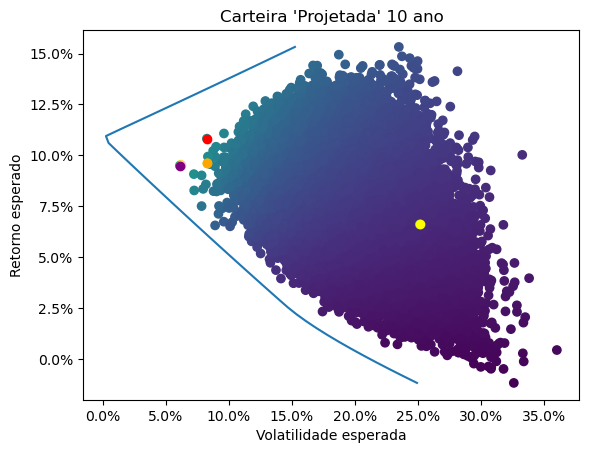

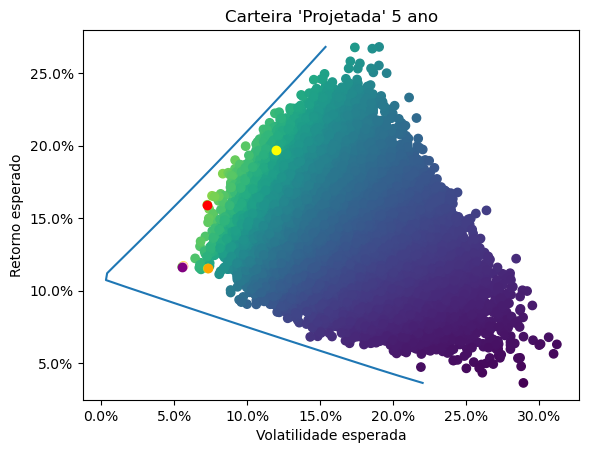

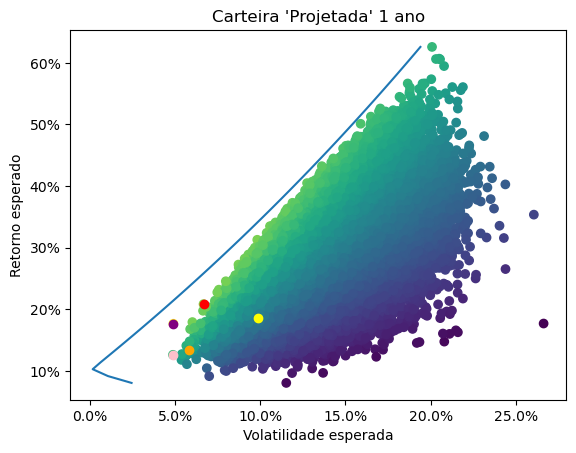

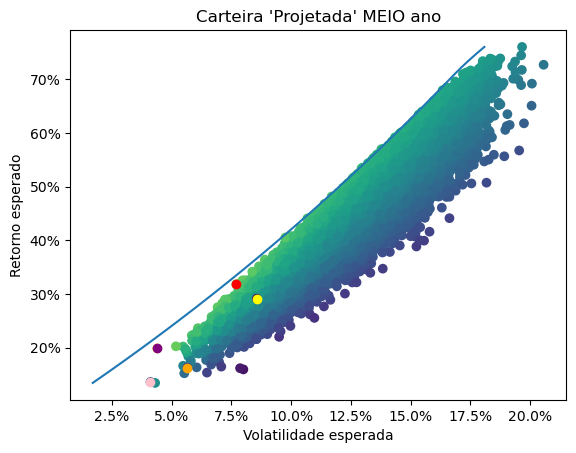

In [692]:
#10 ANOS
fig, axs = plt.subplots()

axs.scatter(tabela_volatilidades_esperadas310, tabela_retornos_esperados_arit310, c= tabela_sharpe310)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
axs.xaxis.label.set_color('black')
axs.yaxis.label.set_color('black')
axs.set_title("Carteira 'Projetada' 10 ano")
axs.scatter(tabela_volatilidades_esperadas310[indice_do_sharpe_maximo310],
          tabela_retornos_esperados_arit310[indice_do_sharpe_maximo310], c = "red")
axs.scatter(tabela_volatilidades_esperadas310[100000],
          tabela_retornos_esperados_arit310[100000], c = "orange")
axs.scatter(tabela_volatilidades_esperadas310[100001],
          tabela_retornos_esperados_arit310[100001], c = "pink")
axs.scatter(tabela_volatilidades_esperadas310[100002],
          tabela_retornos_esperados_arit310[100002], c = "yellow")
axs.scatter(tabela_volatilidades_esperadas310[100003],
          tabela_retornos_esperados_arit310[100003], c = "purple")
axs.plot(eixo_x_fronteira_eficiente310, eixo_y_fronteira_eficiente310)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.tick_params(axis='x', colors='black')
axs.tick_params(axis='y', colors='black')

plt.show()



#5 ANOS

fig, axs = plt.subplots()

axs.scatter(tabela_volatilidades_esperadas35, tabela_retornos_esperados_arit35, c= tabela_sharpe35)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
axs.xaxis.label.set_color('black')
axs.yaxis.label.set_color('black')
axs.set_title("Carteira 'Projetada' 5 ano")
axs.scatter(tabela_volatilidades_esperadas35[indice_do_sharpe_maximo35],
          tabela_retornos_esperados_arit35[indice_do_sharpe_maximo35], c = "red")
axs.scatter(tabela_volatilidades_esperadas35[100000],
          tabela_retornos_esperados_arit35[100000], c = "orange")
axs.scatter(tabela_volatilidades_esperadas35[100001],
          tabela_retornos_esperados_arit35[100001], c = "pink")
axs.scatter(tabela_volatilidades_esperadas35[100002],
          tabela_retornos_esperados_arit35[100002], c = "yellow")
axs.scatter(tabela_volatilidades_esperadas35[100003],
          tabela_retornos_esperados_arit35[100003], c = "purple")
axs.plot(eixo_x_fronteira_eficiente35, eixo_y_fronteira_eficiente35)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.tick_params(axis='x', colors='black')
axs.tick_params(axis='y', colors='black')


plt.show()



# 1 ANO
fig, axs = plt.subplots()

axs.scatter(tabela_volatilidades_esperadas3, tabela_retornos_esperados_arit3, c= tabela_sharpe3)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
axs.xaxis.label.set_color('black')
axs.yaxis.label.set_color('black')
axs.set_title("Carteira 'Projetada' 1 ano")
axs.scatter(tabela_volatilidades_esperadas3[indice_do_sharpe_maximo3],
          tabela_retornos_esperados_arit3[indice_do_sharpe_maximo3], c = "red")
axs.scatter(tabela_volatilidades_esperadas3[100000],
          tabela_retornos_esperados_arit3[100000], c = "orange")
axs.scatter(tabela_volatilidades_esperadas3[100001],
          tabela_retornos_esperados_arit3[100001], c = "pink")
axs.scatter(tabela_volatilidades_esperadas3[100002],
          tabela_retornos_esperados_arit3[100002], c = "yellow")
axs.scatter(tabela_volatilidades_esperadas3[100003],
          tabela_retornos_esperados_arit3[100003], c = "purple")
axs.plot(eixo_x_fronteira_eficiente3, eixo_y_fronteira_eficiente3)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.tick_params(axis='x', colors='black')
axs.tick_params(axis='y', colors='black')

plt.show()


#0.5 ANOS

fig, axs = plt.subplots()

axs.scatter(tabela_volatilidades_esperadas305, tabela_retornos_esperados_arit305, c= tabela_sharpe305)
plt.xlabel("Volatilidade esperada")
plt.ylabel("Retorno esperado")
axs.xaxis.label.set_color('black')
axs.yaxis.label.set_color('black')
axs.set_title("Carteira 'Projetada' MEIO ano")
axs.scatter(tabela_volatilidades_esperadas305[indice_do_sharpe_maximo305],
          tabela_retornos_esperados_arit305[indice_do_sharpe_maximo305], c = "red")
axs.scatter(tabela_volatilidades_esperadas305[100000],
          tabela_retornos_esperados_arit305[100000], c = "orange")
axs.scatter(tabela_volatilidades_esperadas305[100001],
          tabela_retornos_esperados_arit305[100001], c = "pink")
axs.scatter(tabela_volatilidades_esperadas305[100002],
          tabela_retornos_esperados_arit305[100002], c = "yellow")
axs.scatter(tabela_volatilidades_esperadas305[100003],
          tabela_retornos_esperados_arit305[100003], c = "purple")
axs.plot(eixo_x_fronteira_eficiente305, eixo_y_fronteira_eficiente305)
axs.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
axs.tick_params(axis='x', colors='black')
axs.tick_params(axis='y', colors='black')

plt.show()


array([[0.13113019, 0.06583584, 0.0746727 , ..., 0.05206838, 0.22666906,
        0.23731631],
       [0.20232242, 0.22372787, 0.22122006, ..., 0.12963177, 0.00142859,
        0.00447296],
       [0.03910098, 0.09633881, 0.17011265, ..., 0.05893362, 0.03949026,
        0.17811436],
       ...,
       [0.0165679 , 0.00629579, 0.07282983, ..., 0.02737606, 0.37711476,
        0.44939274],
       [0.08268452, 0.39705391, 0.02284327, ..., 0.02311445, 0.01545272,
        0.40631853],
       [0.01488181, 0.00943688, 0.01980828, ..., 0.08617164, 0.15445358,
        0.61740485]])

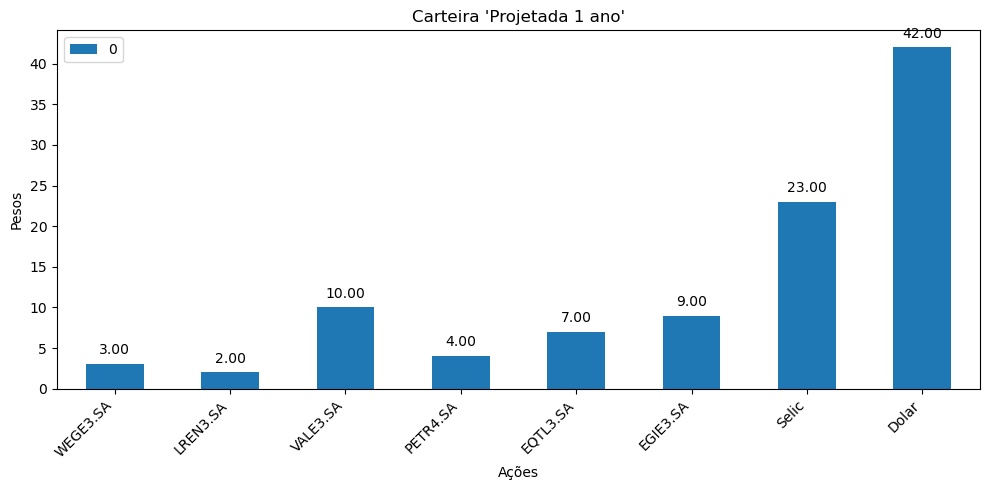

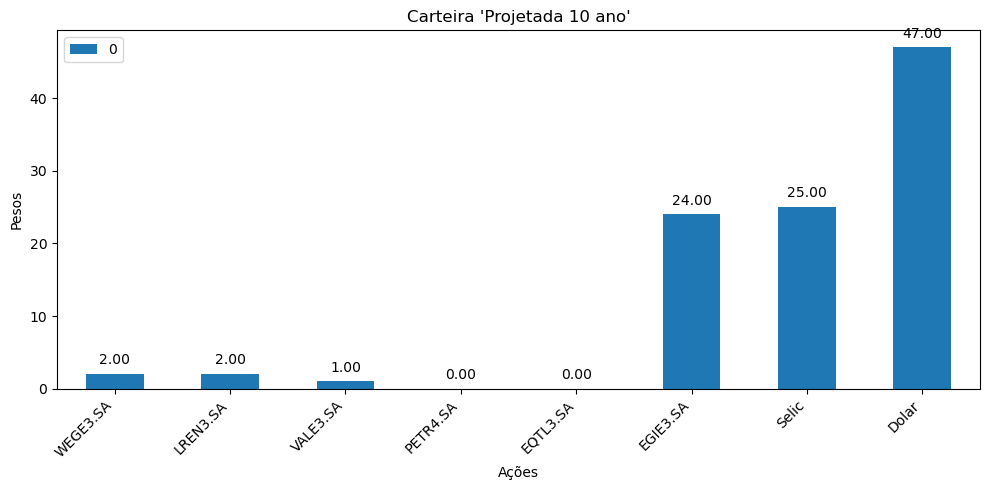

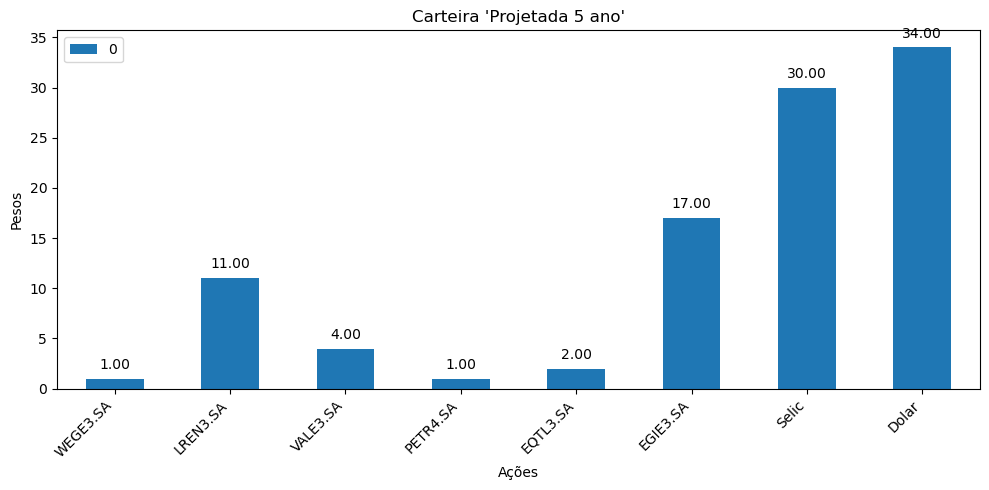

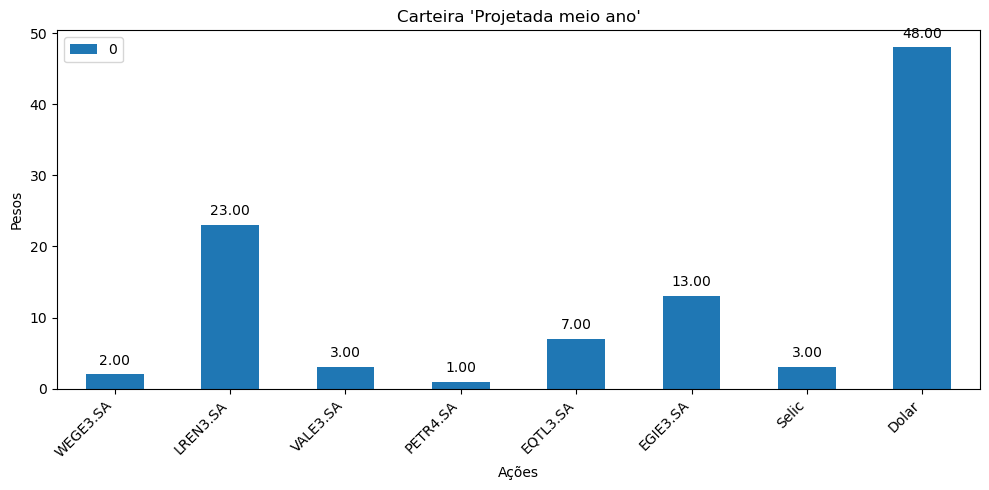

In [693]:
display(tabela_pesos3)
Melhor_peso3 = tabela_pesos3[indice_do_sharpe_maximo3]
Melhor_peso3 = tuple(Melhor_peso3)
Melhor_peso3 = [round(numero*100, 0) for numero in Melhor_peso3]
lista_acoes = tuple(lista_acoes)

Carteira3 = pd.DataFrame(Melhor_peso3,lista_acoes)

ax=Carteira3.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira 'Projetada 1 ano'")
ax.set_xticklabels(Carteira3.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#10 anos
Melhor_peso310 = tabela_pesos310[indice_do_sharpe_maximo310]
Melhor_peso310 = tuple(Melhor_peso310)
Melhor_peso310 = [round(numero*100, 0) for numero in Melhor_peso310]
lista_acoes = tuple(lista_acoes)

Carteira310 = pd.DataFrame(Melhor_peso310,lista_acoes)

ax=Carteira310.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira 'Projetada 10 ano'")
ax.set_xticklabels(Carteira310.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# 5 anos
Melhor_peso35 = tabela_pesos35[indice_do_sharpe_maximo35]
Melhor_peso35 = tuple(Melhor_peso35)
Melhor_peso35 = [round(numero*100, 0) for numero in Melhor_peso35]
lista_acoes = tuple(lista_acoes)

Carteira35 = pd.DataFrame(Melhor_peso35,lista_acoes)

ax=Carteira35.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira 'Projetada 5 ano'")
ax.set_xticklabels(Carteira35.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# 05 anos
Melhor_peso305 = tabela_pesos305[indice_do_sharpe_maximo305]
Melhor_peso305 = tuple(Melhor_peso305)
Melhor_peso305 = [round(numero*100, 0) for numero in Melhor_peso305]
lista_acoes = tuple(lista_acoes)

Carteira305 = pd.DataFrame(Melhor_peso305,lista_acoes)

ax=Carteira305.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos")
ax.set_xlabel("Ações")
ax.set_title("Carteira 'Projetada meio ano'")
ax.set_xticklabels(Carteira305.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

#Valores_finais3 = [
#    {"Tempo em anos": 10,"Volatilidade": tabela_volatilidades_esperadas[indice_do_sharpe_maximo], "Retorno": tabela_retornos_esperados_arit[indice_do_sharpe_maximo], "Indice Sharpe": indice_do_sharpe_maximo},
#    {"Tempo em anos": 5,"Volatilidade": tabela_volatilidades_esperadas1[indice_do_sharpe_maximo1], "Retorno": tabela_retornos_esperados_arit1[indice_do_sharpe_maximo1], "Indice Sharpe": indice_do_sharpe_maximo1},
#     {"Tempo em anos": 1,"Volatilidade": tabela_volatilidades_esperadas2[indice_do_sharpe_maximo2], "Retorno": tabela_retornos_esperados_arit2[indice_do_sharpe_maximo2], "Indice Sharpe": indice_do_sharpe_maximo2},
#      {"Tempo em anos": 0.5,"Volatilidade": tabela_volatilidades_esperadas4[indice_do_sharpe_maximo4], "Retorno": tabela_retornos_esperados_arit4[indice_do_sharpe_maximo4], "Indice Sharpe": indice_do_sharpe_maximo4},
 # {"Tempo em anos": "1 ano futuro","Volatilidade": tabela_volatilidades_esperadas3[indice_do_sharpe_maximo3], "Retorno": tabela_retornos_esperados_arit3[indice_do_sharpe_maximo3], "Indice Sharpe": indice_do_sharpe_maximo2},
 # 
#
#]

#tabela3 = pd.DataFrame(Valores_finais3)
#display (tabela3)

In [694]:
Carteira310.rename(columns={0:'10 Anos'},inplace=True)
Carteira35.rename(columns={0:'5 Anos'},inplace=True)
Carteira3.rename(columns={0:'1 Ano'},inplace=True)
Carteira305.rename(columns={0:'Meio Ano'},inplace=True)

Carteira310 = Carteira310.transpose()
Carteira35 = Carteira35.transpose()
Carteira3 = Carteira3.transpose()
Carteira305 = Carteira305.transpose()

Carteira310 = Carteira310.append(Carteira35)
Carteira310 = Carteira310.append(Carteira3)
Carteira310 = Carteira310.append(Carteira305)
display(Carteira310)


C:\Users\rober\AppData\Local\Temp\ipykernel_15652\2664493706.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Carteira310 = Carteira310.append(Carteira35)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\2664493706.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Carteira310 = Carteira310.append(Carteira3)
C:\Users\rober\AppData\Local\Temp\ipykernel_15652\2664493706.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Carteira310 = Carteira310.append(Carteira305)


,WEGE3.SA,LREN3.SA,VALE3.SA,PETR4.SA,EQTL3.SA,EGIE3.SA,Selic,Dolar
10 Anos,2.0,2.0,1.0,0.0,0.0,24.0,25.0,47.0
5 Anos,1.0,11.0,4.0,1.0,2.0,17.0,30.0,34.0
1 Ano,3.0,2.0,10.0,4.0,7.0,9.0,23.0,42.0
Meio Ano,2.0,23.0,3.0,1.0,7.0,13.0,3.0,48.0


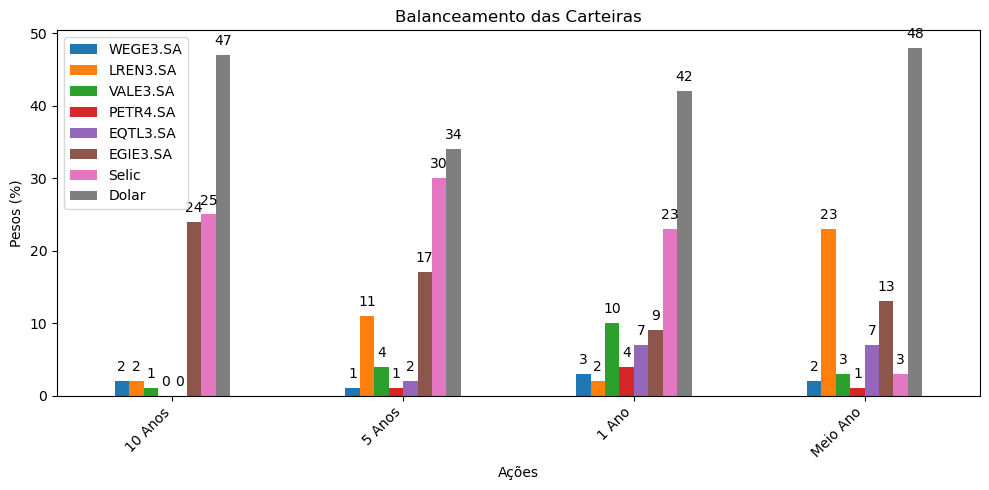

In [695]:
ax=Carteira310.plot(kind="bar", figsize = (10,5))
ax.set_ylabel("Pesos (%)")
ax.set_xlabel("Ações")
ax.set_title("Balanceamento das Carteiras")
ax.set_xticklabels(Carteira310.index, rotation=45, ha="right")
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [696]:
# Entendo que o retorno não deve ser cálculado com base na tabela de retornos e sim com o preço inicial e o preço final
display(precos3)
display(precos3.iloc[0])
display(precos3.iloc[len(precos3)-1])
retornos3 = np.exp(retornos3) - 1
retorno_total = precos3.iloc[len(precos3)-1]/precos3.iloc[0]-1
retorno_selic = retornos3.sum().Selic

retorno_total = pd.DataFrame(retorno_total)
retorno_total= np.append(retorno_total,retorno_selic)

# Retorno acumulado para carteiras de 10 5 1 e 1/2 ano
retorno_acum = tabela_pesos[indice_do_sharpe_maximo]*retorno_total
retorno_acum1 = tabela_pesos1[indice_do_sharpe_maximo1]*retorno_total
retorno_acum2 = tabela_pesos2[indice_do_sharpe_maximo2]*retorno_total
retorno_acum4 = tabela_pesos4[indice_do_sharpe_maximo4]*retorno_total


retorno_carteiras = [
                        {"Carteira": "10 anos", "Retorno %ls"%(final310): retorno_acum.sum()*100},
                        {"Carteira": "5 anos", "Retorno %s"%(final310):  retorno_acum1.sum()*100},
                        {"Carteira": "1 ano", "Retorno %s"%(final310): retorno_acum2.sum()*100},
                        {"Carteira": "1/2 ano", "Retorno %s"%(final310): retorno_acum4.sum()*100},
                    ]
Retorno_carteiras = pd.DataFrame(retorno_carteiras)

display(Retorno_carteiras)

,EGIE3.SA,EQTL3.SA,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,Dólar
2017-01-02,16.673311,9.587374,16.774582,5.198050,15.886398,5.246079,3.2729
2017-01-03,17.319201,9.568111,17.289280,5.495893,16.590065,5.510120,3.2632
2017-01-04,17.099117,9.604884,17.137047,5.495893,16.292116,5.378099,3.2333
2017-01-05,16.974724,9.587374,16.977560,5.584535,16.913374,5.364201,3.2129
2017-01-06,16.764217,9.543594,16.781837,5.552625,16.463276,5.409367,3.2057
...,...,...,...,...,...,...,...
2017-12-22,18.249287,11.319807,27.209881,5.584535,26.344208,8.593367,3.3209
2017-12-26,18.347483,11.500331,27.952698,5.662542,26.383924,8.745619,3.3200
2017-12-27,18.461189,11.636604,28.663233,5.690909,26.390549,8.742078,3.3031
2017-12-28,18.352655,11.618908,28.655149,5.708638,26.655378,8.536716,3.3080


EGIE3.SA    16.673311
EQTL3.SA     9.587374
LREN3.SA    16.774582
PETR4.SA     5.198050
VALE3.SA    15.886398
WEGE3.SA     5.246079
Dólar        3.272900
Name: 2017-01-02 00:00:00, dtype: float64

EGIE3.SA    18.352655
EQTL3.SA    11.618908
LREN3.SA    28.655149
PETR4.SA     5.708638
VALE3.SA    26.655378
WEGE3.SA     8.536716
Dólar        3.308000
Name: 2017-12-29 00:00:00, dtype: float64

,Carteira,Retorno 2017-12-31
0,10 anos,14.528409
1,5 anos,13.734622
2,1 ano,18.927345
3,1/2 ano,18.859833


In [701]:
Data = [
    {'Data': '2023-06-30', '10 Anos (%)': 12.87, '5 Anos (%)': 10.69, '1 Ano (%)': 9.42, 'Meio Ano (%)': 22.46},
    {'Data': '2022-12-31', '10 Anos (%)': 8.54, '5 Anos (%)': 8.99, '1 Ano (%)': 8.26, 'Meio Ano (%)': 12.18},
    {'Data': '2021-12-31', '10 Anos (%)': 0.79, '5 Anos (%)': 1.71, '1 Ano (%)': 1.01, 'Meio Ano (%)': -0.21},
    {'Data': '2017-12-31', '10 Anos (%)': 14.52, '5 Anos (%)': 13.73, '1 Ano (%)': 18.93, 'Meio Ano (%)': 18.86},
       ]
retorno_geral= pd.DataFrame(Data)
display(pd.DataFrame(Data))

,Data,10 Anos (%),5 Anos (%),1 Ano (%),Meio Ano (%)
0,2023-06-30,12.87,10.69,9.42,22.46
1,2022-12-31,8.54,8.99,8.26,12.18
2,2021-12-31,0.79,1.71,1.01,-0.21
3,2017-12-31,14.52,13.73,18.93,18.86


In [702]:
ano1 = [{'Data': '2023-06-30', '10 Anos (%)': 12.87, '5 Anos (%)': 10.69, '1 Ano (%)': 9.42, 'Meio Ano (%)': 22.46},
    ]
retorno_geral= pd.DataFrame(ano1)
display(pd.DataFrame(ano1))

,Data,10 Anos (%),5 Anos (%),1 Ano (%),Meio Ano (%)
0,2023-06-30,12.87,10.69,9.42,22.46


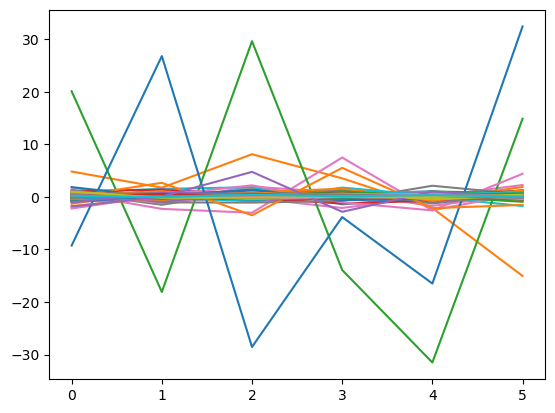